# Investigacion 1. Preprocesado de un set de datos de mediana complejidad.
David Martinez Garcia.

Reconocimiento de Patrones.

Maestria en Electronica.

Instituto Tecnologico de Costa Rica.


Dataset recuperado de https://www.kaggle.com/harvard-university/course-enrollment-stats 

El set de datos consiste en los datos de cursos inscritos a la universidad de hardvard durante otoño del 2015.


In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

Se cargan la lista de cursos desde el CSV.

In [50]:
course_enrollment = pd.read_csv("harvard-course-enrollment-fall-2015.csv")


Visualizamos las primeras lineas:

In [51]:
course_enrollment.head()

,COURSE,DEPARTMENT,COURSEID,CLASSNBR,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG
0,AESTHINT 13,GENED,123834.0,13038.0,51.0,NaN,48.0,1.0,1.0,1.0
1,AESTHINT 24,GENED,110744.0,10514.0,198.0,NaN,198.0,NaN,NaN,NaN
2,AESTHINT 33,GENED,124912.0,14909.0,27.0,NaN,27.0,NaN,NaN,NaN
3,AESTHINT 37,GENED,126284.0,13724.0,77.0,NaN,77.0,NaN,NaN,NaN
4,AESTHINT 39,GENED,124661.0,13235.0,37.0,NaN,37.0,NaN,NaN,NaN


En primer lugar, segun la documentación tenemos 3 columnas que nos proporcionan un valor único par nuestros datos: COURSE, COURSEID y CLASSNBR. Se optara por dejar COURSE como el indice y eliminar el resto.

In [52]:
course_enrollment.set_index('COURSE', inplace = True)
del course_enrollment['COURSEID']
del course_enrollment['CLASSNBR']
course_enrollment

,DEPARTMENT,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG
COURSE,,,,,,,
AESTHINT 13,GENED,51.0,NaN,48.0,1.0,1.0,1.0
AESTHINT 24,GENED,198.0,NaN,198.0,NaN,NaN,NaN
AESTHINT 33,GENED,27.0,NaN,27.0,NaN,NaN,NaN
AESTHINT 37,GENED,77.0,NaN,77.0,NaN,NaN,NaN
AESTHINT 39,GENED,37.0,NaN,37.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
YIDDISH CA,NELC,2.0,NaN,2.0,NaN,NaN,NaN
YORUBA AA,AAAS,7.0,NaN,6.0,NaN,NaN,1.0
YORUBA BA,AAAS,5.0,1.0,4.0,NaN,NaN,NaN


Todos los valores estan dados por cantidad de estudiantes. Los NaN provienen de que los datos no poseen un "0" explicito, sino que no se le pone ningun valor a la columna.

In [53]:
course_enrollment.fillna(0, inplace = True)


Visualizando los datos de nuevo:

In [54]:
course_enrollment

,DEPARTMENT,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG
COURSE,,,,,,,
AESTHINT 13,GENED,51.0,0.0,48.0,1.0,1.0,1.0
AESTHINT 24,GENED,198.0,0.0,198.0,0.0,0.0,0.0
AESTHINT 33,GENED,27.0,0.0,27.0,0.0,0.0,0.0
AESTHINT 37,GENED,77.0,0.0,77.0,0.0,0.0,0.0
AESTHINT 39,GENED,37.0,0.0,37.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
YIDDISH CA,NELC,2.0,0.0,2.0,0.0,0.0,0.0
YORUBA AA,AAAS,7.0,0.0,6.0,0.0,0.0,1.0
YORUBA BA,AAAS,5.0,1.0,4.0,0.0,0.0,0.0


Cambiar los valores NaN a cero es cierto excepto para la ultima linea, el valor de DEPARTMENT no tiene sentido de ser 0. Sin embargo, esta columna la vamos a cambiar para convertirla en OneHot.

In [55]:
one_hot = pd.get_dummies(course_enrollment['DEPARTMENT'])
one_hot

,0,AAAS,AMER,ANTH,ASTR,BIOE,BIPH,BIST,BSDM,BSPH,CELT,CHBI,CHEM,CHPB,CLAS,CPLT,DRAM,E&PS,EALC,ECON,EMR,ENGL,ESPP,EXPO,FAS,FOLK,FRSP,GENED,GERM,GLOBHLTH,GOVM,HAA,HEB,HIST,HLIT,HPOL,HSCI,HSS,HUM,LING,LSCI,MATH,MBB,MCB,MDSC,MDST,MUSC,NELC,NEURO,NODEPT,PHIL,PHYS,PSCI,PSYC,REECA,RELG,ROML,RSEA,SAST,SBIO,SCRB,SEAS,SLAV,SOCL,SOST,STAT,URBP,VES,WMGS
COURSE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AESTHINT 13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YIDDISH CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
YORUBA AA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
YORUBA BA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Ahora, eliminemos la columna DEPARTMENT 

In [56]:
course_enrollment = course_enrollment.drop('DEPARTMENT',axis = 1)
course_enrollment


,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG
COURSE,,,,,,
AESTHINT 13,51.0,0.0,48.0,1.0,1.0,1.0
AESTHINT 24,198.0,0.0,198.0,0.0,0.0,0.0
AESTHINT 33,27.0,0.0,27.0,0.0,0.0,0.0
AESTHINT 37,77.0,0.0,77.0,0.0,0.0,0.0
AESTHINT 39,37.0,0.0,37.0,0.0,0.0,0.0
...,...,...,...,...,...,...
YIDDISH CA,2.0,0.0,2.0,0.0,0.0,0.0
YORUBA AA,7.0,0.0,6.0,0.0,0.0,1.0
YORUBA BA,5.0,1.0,4.0,0.0,0.0,0.0


Añadamos la codificacion de OneHot.

In [57]:
course_enrollment = pd.concat([course_enrollment, one_hot], axis=1)
course_enrollment

,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG,0,AAAS,AMER,ANTH,ASTR,BIOE,BIPH,BIST,BSDM,BSPH,CELT,CHBI,CHEM,CHPB,CLAS,CPLT,DRAM,E&PS,EALC,ECON,EMR,ENGL,ESPP,EXPO,FAS,FOLK,FRSP,GENED,GERM,GLOBHLTH,GOVM,HAA,HEB,HIST,HLIT,HPOL,HSCI,HSS,HUM,LING,LSCI,MATH,MBB,MCB,MDSC,MDST,MUSC,NELC,NEURO,NODEPT,PHIL,PHYS,PSCI,PSYC,REECA,RELG,ROML,RSEA,SAST,SBIO,SCRB,SEAS,SLAV,SOCL,SOST,STAT,URBP,VES,WMGS
COURSE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AESTHINT 13,51.0,0.0,48.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 24,198.0,0.0,198.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 33,27.0,0.0,27.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 37,77.0,0.0,77.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 39,37.0,0.0,37.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YIDDISH CA,2.0,0.0,2.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
YORUBA AA,7.0,0.0,6.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
YORUBA BA,5.0,1.0,4.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Se añade una columna denominada "0" que fue producto del TOTAL que poseia un valor erroneo de cero. Procedemos a borrar la columna.

In [58]:
course_enrollment = course_enrollment.drop(0, axis=1)
course_enrollment

,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG,AAAS,AMER,ANTH,ASTR,BIOE,BIPH,BIST,BSDM,BSPH,CELT,CHBI,CHEM,CHPB,CLAS,CPLT,DRAM,E&PS,EALC,ECON,EMR,ENGL,ESPP,EXPO,FAS,FOLK,FRSP,GENED,GERM,GLOBHLTH,GOVM,HAA,HEB,HIST,HLIT,HPOL,HSCI,HSS,HUM,LING,LSCI,MATH,MBB,MCB,MDSC,MDST,MUSC,NELC,NEURO,NODEPT,PHIL,PHYS,PSCI,PSYC,REECA,RELG,ROML,RSEA,SAST,SBIO,SCRB,SEAS,SLAV,SOCL,SOST,STAT,URBP,VES,WMGS
COURSE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AESTHINT 13,51.0,0.0,48.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 24,198.0,0.0,198.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 33,27.0,0.0,27.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 37,77.0,0.0,77.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 39,37.0,0.0,37.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YIDDISH CA,2.0,0.0,2.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
YORUBA AA,7.0,0.0,6.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
YORUBA BA,5.0,1.0,4.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Ya con los datos ordenados, estudiemolos un poco

In [59]:
course_enrollment.describe()

,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG,AAAS,AMER,ANTH,ASTR,BIOE,BIPH,BIST,BSDM,BSPH,CELT,CHBI,CHEM,CHPB,CLAS,CPLT,DRAM,E&PS,EALC,ECON,EMR,ENGL,ESPP,EXPO,FAS,FOLK,FRSP,GENED,GERM,GLOBHLTH,GOVM,HAA,HEB,HIST,HLIT,HPOL,HSCI,HSS,HUM,LING,LSCI,MATH,MBB,MCB,MDSC,MDST,MUSC,NELC,NEURO,NODEPT,PHIL,PHYS,PSCI,PSYC,REECA,RELG,ROML,RSEA,SAST,SBIO,SCRB,SEAS,SLAV,SOCL,SOST,STAT,URBP,VES,WMGS
count,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000
mean,26.655978,6.909725,18.710352,0.177762,0.142210,0.713838,0.019170,0.005228,0.014639,0.009062,0.017428,0.006274,0.008714,0.000349,0.010457,0.003137,0.001046,0.013245,0.000697,0.020565,0.007668,0.004183,0.013942,0.027536,0.027884,0.000697,0.027187,0.002440,0.023353,0.000349,0.001743,0.029976,0.017428,0.009759,0.000697,0.022307,0.010457,0.012548,0.034158,0.004880,0.002788,0.009411,0.000349,0.001394,0.006274,0.001394,0.016033,0.001743,0.015336,0.093064,0.000697,0.016033,0.021262,0.002440,0.117811,0.017428,0.025444,0.000349,0.036598,0.000697,0.015685,0.038341,0.004880,0.012199,0.011154,0.004880,0.060300,0.012896,0.012896,0.005577,0.008714,0.000697,0.011851,0.003834
std,714.731083,185.898948,502.075419,4.956412,3.846514,19.215126,0.137148,0.072130,0.120125,0.094781,0.130881,0.078973,0.092957,0.018670,0.101739,0.055931,0.032325,0.114342,0.026398,0.141946,0.087247,0.064549,0.117271,0.163667,0.164670,0.026398,0.162657,0.049343,0.151049,0.018670,0.041717,0.170550,0.130881,0.098324,0.026398,0.147707,0.101739,0.111332,0.181667,0.069697,0.052741,0.096569,0.018670,0.037320,0.078973,0.037320,0.125626,0.041717,0.122908,0.290572,0.026398,0.125626,0.144281,0.049343,0.322440,0.130881,0.157498,0.018670,0.187806,0.026398,0.124275,0.192051,0.069697,0.109794,0.105039,0.069697,0.238083,0.112848,0.112848,0.074483,0.092957,0.026398,0.108233,0.061812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,1.000000,0.000000,0.

Los valores no nos dan buenos resultados en terminos estadisticos, dado que los valores totales nos mueven las desviaciones standard y los maximos. Eliminaremos la ultima fila que corresponde a los totales

In [60]:
course_enrollment = course_enrollment[:-1]
course_enrollment

,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG,AAAS,AMER,ANTH,ASTR,BIOE,BIPH,BIST,BSDM,BSPH,CELT,CHBI,CHEM,CHPB,CLAS,CPLT,DRAM,E&PS,EALC,ECON,EMR,ENGL,ESPP,EXPO,FAS,FOLK,FRSP,GENED,GERM,GLOBHLTH,GOVM,HAA,HEB,HIST,HLIT,HPOL,HSCI,HSS,HUM,LING,LSCI,MATH,MBB,MCB,MDSC,MDST,MUSC,NELC,NEURO,NODEPT,PHIL,PHYS,PSCI,PSYC,REECA,RELG,ROML,RSEA,SAST,SBIO,SCRB,SEAS,SLAV,SOCL,SOST,STAT,URBP,VES,WMGS
COURSE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AESTHINT 13,51.0,0.0,48.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 24,198.0,0.0,198.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 33,27.0,0.0,27.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 37,77.0,0.0,77.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AESTHINT 39,37.0,0.0,37.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YIDDISH BA,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
YIDDISH CA,2.0,0.0,2.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
YORUBA AA,7.0,0.0,6.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
course_enrollment.describe()

,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG,AAAS,AMER,ANTH,ASTR,BIOE,BIPH,BIST,BSDM,BSPH,CELT,CHBI,CHEM,CHPB,CLAS,CPLT,DRAM,E&PS,EALC,ECON,EMR,ENGL,ESPP,EXPO,FAS,FOLK,FRSP,GENED,GERM,GLOBHLTH,GOVM,HAA,HEB,HIST,HLIT,HPOL,HSCI,HSS,HUM,LING,LSCI,MATH,MBB,MCB,MDSC,MDST,MUSC,NELC,NEURO,NODEPT,PHIL,PHYS,PSCI,PSYC,REECA,RELG,ROML,RSEA,SAST,SBIO,SCRB,SEAS,SLAV,SOCL,SOST,STAT,URBP,VES,WMGS
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000
mean,13.332636,3.456067,9.358438,0.088912,0.071130,0.357043,0.019177,0.005230,0.014644,0.009066,0.017434,0.006276,0.008717,0.000349,0.010460,0.003138,0.001046,0.013250,0.000697,0.020572,0.007671,0.004184,0.013947,0.027545,0.027894,0.000697,0.027197,0.002441,0.023361,0.000349,0.001743,0.029986,0.017434,0.009763,0.000697,0.022315,0.010460,0.012552,0.034170,0.004881,0.002789,0.009414,0.000349,0.001395,0.006276,0.001395,0.016039,0.001743,0.015342,0.093096,0.000697,0.016039,0.021269,0.002441,0.117852,0.017434,0.025453,0.000349,0.036611,0.000697,0.015690,0.038354,0.004881,0.012204,0.011158,0.004881,0.060321,0.012901,0.012901,0.005579,0.008717,0.000697,0.011855,0.003835
std,39.506454,18.379819,34.092170,1.384846,0.548165,1.998115,0.137171,0.072143,0.120145,0.094797,0.130904,0.078987,0.092973,0.018673,0.101757,0.055940,0.032331,0.114362,0.026403,0.141971,0.087262,0.064560,0.117291,0.163695,0.164698,0.026403,0.162684,0.049352,0.151074,0.018673,0.041725,0.170579,0.130904,0.098341,0.026403,0.147732,0.101757,0.111351,0.181698,0.069709,0.052750,0.096586,0.018673,0.037326,0.078987,0.037326,0.125648,0.041725,0.122929,0.290618,0.026403,0.125648,0.144305,0.049352,0.322489,0.130904,0.157525,0.018673,0.187837,0.026403,0.124296,0.192083,0.069709,0.109813,0.105057,0.069709,0.238122,0.112867,0.112867,0.074496,0.092973,0.026403,0.108252,0.061823
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,1.000000,0.000000,0.00000

Una vez eliminado los datos totales, podemos ver que algunos valores máximos continuan siendo un poco altos, por lo que tal vez sea conveniente eliminar algunos outliers. 
Observemos unos graficos para ver la tendencia de los datos.

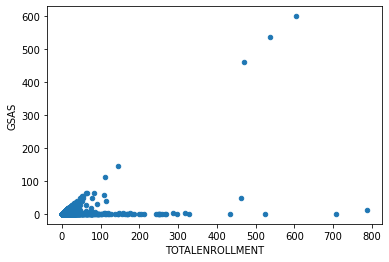

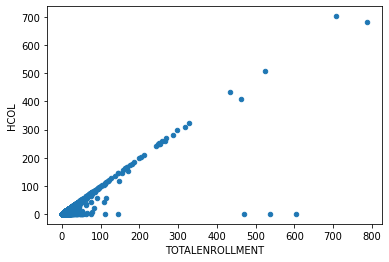

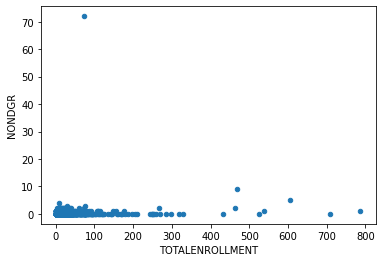

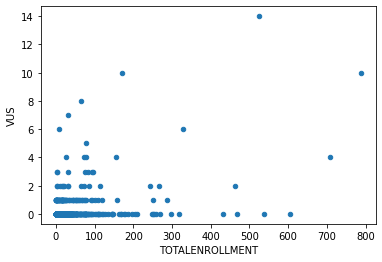

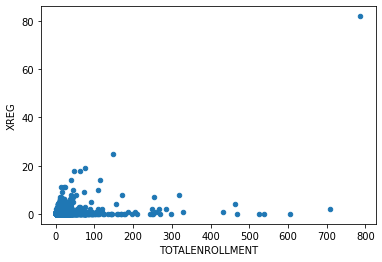

In [62]:
  course_enrollment.plot.scatter(x="TOTALENROLLMENT", y="GSAS")
  course_enrollment.plot.scatter(x="TOTALENROLLMENT", y="HCOL")
  course_enrollment.plot.scatter(x="TOTALENROLLMENT", y="NONDGR")
  course_enrollment.plot.scatter(x="TOTALENROLLMENT", y="VUS")
  course_enrollment.plot.scatter(x="TOTALENROLLMENT", y="XREG")

De la exploracion visual parecen existir algunos datos outliers que se pueden eliminar.

Antes de desechar outliers basados en medias y medianas, observemos un poco el comportamiento por DEPARTMENT.  

DEPARTMENT Name :  AAAS
       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        55.000000  55.000000  55.000000  55.000000  ...  55.0  55.0  55.0  55.0
mean          8.963636   1.018182   7.381818   0.054545  ...   0.0   0.0   0.0   0.0
std          14.700672   1.557430  14.502223   0.229184  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           1.000000   0.000000   0.500000   0.000000  ...   0.0   0.0   0.0   0.0
50%           3.000000   0.000000   2.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%          10.500000   1.000000   8.000000   0.000000  ...   0.0   0.0   0.0   0.0
max          90.000000   7.000000  90.000000   1.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  AMER
       TOTALENROLLMENT       GSAS  HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        15.000000  15.000000  15.0  15.000000  ...  15.0  15.0  15.0  15.0
mean

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS  HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        18.000000  18.000000  18.0    18.0  ...  18.0  18.0  18.0  18.0
mean          3.833333   3.833333   0.0     0.0  ...   0.0   0.0   0.0   0.0
std           8.692458   8.692458   0.0     0.0  ...   0.0   0.0   0.0   0.0
min           1.000000   1.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0
25%           1.000000   1.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0
50%           1.000000   1.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0
75%           2.000000   2.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0
max          38.000000  38.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  BIST


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT      GSAS  HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        25.000000  25.00000  25.0  25.000000  ...  25.0  25.0  25.0  25.0
mean          4.200000   4.12000   0.0   0.080000  ...   0.0   0.0   0.0   0.0
std           5.008326   4.98598   0.0   0.276887  ...   0.0   0.0   0.0   0.0
min           1.000000   1.00000   0.0   0.000000  ...   0.0   0.0   0.0   0.0
25%           1.000000   1.00000   0.0   0.000000  ...   0.0   0.0   0.0   0.0
50%           2.000000   2.00000   0.0   0.000000  ...   0.0   0.0   0.0   0.0
75%           6.000000   5.00000   0.0   0.000000  ...   0.0   0.0   0.0   0.0
max          22.000000  22.00000   0.0   1.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  BSDM


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS  HCOL  NONDGR  VUS  ...  SOST  STAT  URBP  VES  WMGS
count              1.0   1.0   1.0     1.0  1.0  ...   1.0   1.0   1.0  1.0   1.0
mean               3.0   3.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
std                NaN   NaN   NaN     NaN  NaN  ...   NaN   NaN   NaN  NaN   NaN
min                3.0   3.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
25%                3.0   3.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
50%                3.0   3.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
75%                3.0   3.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
max                3.0   3.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  BSPH


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS  HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        30.000000  30.000000  30.0    30.0  ...  30.0  30.0  30.0  30.0
mean          2.933333   2.900000   0.0     0.0  ...   0.0   0.0   0.0   0.0
std           2.923547   2.808239   0.0     0.0  ...   0.0   0.0   0.0   0.0
min           1.000000   1.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0
25%           1.000000   1.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0
50%           2.000000   2.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0
75%           3.000000   3.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0
max          13.000000  12.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  CELT


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT      GSAS       HCOL  NONDGR  ...  STAT  URBP  VES  WMGS
count         9.000000  9.000000   9.000000     9.0  ...   9.0   9.0  9.0   9.0
mean          4.777778  1.555556   3.222222     0.0  ...   0.0   0.0  0.0   0.0
std           5.761462  1.878238   6.220486     0.0  ...   0.0   0.0  0.0   0.0
min           1.000000  0.000000   0.000000     0.0  ...   0.0   0.0  0.0   0.0
25%           1.000000  1.000000   0.000000     0.0  ...   0.0   0.0  0.0   0.0
50%           3.000000  1.000000   1.000000     0.0  ...   0.0   0.0  0.0   0.0
75%           6.000000  1.000000   2.000000     0.0  ...   0.0   0.0  0.0   0.0
max          19.000000  6.000000  19.000000     0.0  ...   0.0   0.0  0.0   0.0

[8 rows x 74 columns]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


DEPARTMENT Name :  CHBI


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS  HCOL  NONDGR  ...  STAT  URBP  VES  WMGS
count         3.000000   3.000000   3.0     3.0  ...   3.0   3.0  3.0   3.0
mean         27.666667  27.666667   0.0     0.0  ...   0.0   0.0  0.0   0.0
std          21.939310  21.939310   0.0     0.0  ...   0.0   0.0  0.0   0.0
min          15.000000  15.000000   0.0     0.0  ...   0.0   0.0  0.0   0.0
25%          15.000000  15.000000   0.0     0.0  ...   0.0   0.0  0.0   0.0
50%          15.000000  15.000000   0.0     0.0  ...   0.0   0.0  0.0   0.0
75%          34.000000  34.000000   0.0     0.0  ...   0.0   0.0  0.0   0.0
max          53.000000  53.000000   0.0     0.0  ...   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  CHEM


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS        HCOL  ...  URBP   VES  WMGS
count        38.000000  38.000000   38.000000  ...  38.0  38.0  38.0
mean         22.157895   6.763158   15.236842  ...   0.0   0.0   0.0
std          46.203151   7.430522   47.279751  ...   0.0   0.0   0.0
min           1.000000   0.000000    0.000000  ...   0.0   0.0   0.0
25%           4.000000   1.000000    0.000000  ...   0.0   0.0   0.0
50%           9.000000   4.000000    0.000000  ...   0.0   0.0   0.0
75%          16.000000  11.500000    5.500000  ...   0.0   0.0   0.0
max         259.000000  27.000000  258.000000  ...   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  CHPB
       TOTALENROLLMENT  GSAS     HCOL  NONDGR  VUS  ...  SOST  STAT  URBP  VES  WMGS
count          2.00000   2.0  2.00000     2.0  2.0  ...   2.0   2.0   2.0  2.0   2.0
mean           2.50000   0.0  2.50000     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
std            2.12132   0.0  2.12132     0.0  0.0  ...   0.0   0.0   0.0  0.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        59.000000  59.000000  59.000000  59.000000  ...  59.0  59.0  59.0  59.0
mean          5.033898   1.491525   3.355932   0.050847  ...   0.0   0.0   0.0   0.0
std           6.068477   1.685362   6.135714   0.221572  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           3.000000   1.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%           6.500000   2.000000   4.500000   0.000000  ...   0.0   0.0   0.0   0.0
max          36.000000   7.000000  33.000000   1.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  CPLT


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        22.000000  22.000000  22.000000  22.000000  ...  22.0  22.0  22.0  22.0
mean          6.500000   3.863636   2.181818   0.136364  ...   0.0   0.0   0.0   0.0
std           6.375175   4.930908   3.580853   0.467563  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           1.250000   1.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           5.500000   2.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%           8.750000   4.750000   2.750000   0.000000  ...   0.0   0.0   0.0   0.0
max          26.000000  19.000000  12.000000   2.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  DRAM


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS       HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        12.000000  12.0  12.000000    12.0  ...  12.0  12.0  12.0  12.0
mean          9.833333   0.0   9.666667     0.0  ...   0.0   0.0   0.0   0.0
std           5.859465   0.0   6.035250     0.0  ...   0.0   0.0   0.0   0.0
min           1.000000   0.0   1.000000     0.0  ...   0.0   0.0   0.0   0.0
25%           4.250000   0.0   2.750000     0.0  ...   0.0   0.0   0.0   0.0
50%          13.000000   0.0  13.000000     0.0  ...   0.0   0.0   0.0   0.0
75%          14.000000   0.0  14.000000     0.0  ...   0.0   0.0   0.0   0.0
max          17.000000   0.0  17.000000     0.0  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  E&PS


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        40.000000  40.000000  40.000000    40.0  ...  40.0  40.0  40.0  40.0
mean          4.800000   2.800000   1.725000     0.0  ...   0.0   0.0   0.0   0.0
std           4.762029   3.428388   3.693289     0.0  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000     0.0  ...   0.0   0.0   0.0   0.0
25%           2.000000   1.000000   0.000000     0.0  ...   0.0   0.0   0.0   0.0
50%           3.000000   2.000000   0.000000     0.0  ...   0.0   0.0   0.0   0.0
75%           7.000000   3.000000   1.000000     0.0  ...   0.0   0.0   0.0   0.0
max          23.000000  19.000000  17.000000     0.0  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  EALC


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        79.000000  79.000000  79.000000  79.000000  ...  79.0  79.0  79.0  79.0
mean          9.000000   2.417722   5.886076   0.037975  ...   0.0   0.0   0.0   0.0
std           7.964666   2.604767   7.087344   0.192356  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           3.500000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           8.000000   1.000000   4.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%          11.500000   4.000000   9.000000   0.000000  ...   0.0   0.0   0.0   0.0
max          45.000000  12.000000  27.000000   1.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


DEPARTMENT Name :  ECON
       TOTALENROLLMENT       GSAS        HCOL  ...  URBP   VES  WMGS
count        80.000000  80.000000   80.000000  ...  80.0  80.0  80.0
mean         35.325000   5.500000   27.475000  ...   0.0   0.0   0.0
std          92.027345   8.286026   91.983897  ...   0.0   0.0   0.0
min           1.000000   0.000000    0.000000  ...   0.0   0.0   0.0
25%           6.750000   0.000000    0.000000  ...   0.0   0.0   0.0
50%          10.000000   2.000000    2.000000  ...   0.0   0.0   0.0
75%          21.750000   8.000000   10.250000  ...   0.0   0.0   0.0
max         709.000000  34.000000  703.000000  ...   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  EMR


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT      GSAS      HCOL  NONDGR  ...  STAT  URBP  VES  WMGS
count              2.0  2.000000  2.000000     2.0  ...   2.0   2.0  2.0   2.0
mean               2.0  0.500000  1.500000     0.0  ...   0.0   0.0  0.0   0.0
std                0.0  0.707107  0.707107     0.0  ...   0.0   0.0  0.0   0.0
min                2.0  0.000000  1.000000     0.0  ...   0.0   0.0  0.0   0.0
25%                2.0  0.250000  1.250000     0.0  ...   0.0   0.0  0.0   0.0
50%                2.0  0.500000  1.500000     0.0  ...   0.0   0.0  0.0   0.0
75%                2.0  0.750000  1.750000     0.0  ...   0.0   0.0  0.0   0.0
max                2.0  1.000000  2.000000     0.0  ...   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  ENGL


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS        HCOL  ...  URBP   VES  WMGS
count        78.000000  78.000000   78.000000  ...  78.0  78.0  78.0
mean         10.141026   1.705128    8.102564  ...   0.0   0.0   0.0
std          16.464621   2.324958   16.464515  ...   0.0   0.0   0.0
min           1.000000   0.000000    0.000000  ...   0.0   0.0   0.0
25%           2.000000   0.000000    0.000000  ...   0.0   0.0   0.0
50%           5.000000   1.000000    0.000000  ...   0.0   0.0   0.0
75%          11.000000   2.000000    8.750000  ...   0.0   0.0   0.0
max         110.000000  12.000000  105.000000  ...   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  ESPP


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT      GSAS       HCOL  NONDGR  ...  STAT  URBP  VES  WMGS
count         7.000000  7.000000   7.000000     7.0  ...   7.0   7.0  7.0   7.0
mean         15.285714  0.142857  14.857143     0.0  ...   0.0   0.0  0.0   0.0
std          18.909559  0.377964  19.117432     0.0  ...   0.0   0.0  0.0   0.0
min           1.000000  0.000000   1.000000     0.0  ...   0.0   0.0  0.0   0.0
25%           4.000000  0.000000   3.500000     0.0  ...   0.0   0.0  0.0   0.0
50%          10.000000  0.000000   8.000000     0.0  ...   0.0   0.0  0.0   0.0
75%          16.000000  0.000000  16.000000     0.0  ...   0.0   0.0  0.0   0.0
max          56.000000  1.000000  56.000000     0.0  ...   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  EXPO


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS       HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        67.000000  67.0  67.000000    67.0  ...  67.0  67.0  67.0  67.0
mean         13.447761   0.0  13.447761     0.0  ...   0.0   0.0   0.0   0.0
std           3.673342   0.0   3.673342     0.0  ...   0.0   0.0   0.0   0.0
min           8.000000   0.0   8.000000     0.0  ...   0.0   0.0   0.0   0.0
25%          10.000000   0.0  10.000000     0.0  ...   0.0   0.0   0.0   0.0
50%          14.000000   0.0  14.000000     0.0  ...   0.0   0.0   0.0   0.0
75%          15.000000   0.0  15.000000     0.0  ...   0.0   0.0   0.0   0.0
max          30.000000   0.0  30.000000     0.0  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  FAS


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS  HCOL  NONDGR  VUS  ...  SOST  STAT  URBP  VES  WMGS
count              1.0   1.0   1.0     1.0  1.0  ...   1.0   1.0   1.0  1.0   1.0
mean              37.0  37.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
std                NaN   NaN   NaN     NaN  NaN  ...   NaN   NaN   NaN  NaN   NaN
min               37.0  37.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
25%               37.0  37.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
50%               37.0  37.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
75%               37.0  37.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
max               37.0  37.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  FOLK


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS       HCOL  NONDGR  ...  STAT  URBP  VES  WMGS
count         5.000000   5.0   5.000000     5.0  ...   5.0   5.0  5.0   5.0
mean         17.200000   0.0  17.200000     0.0  ...   0.0   0.0  0.0   0.0
std          24.803226   0.0  24.803226     0.0  ...   0.0   0.0  0.0   0.0
min           3.000000   0.0   3.000000     0.0  ...   0.0   0.0  0.0   0.0
25%           4.000000   0.0   4.000000     0.0  ...   0.0   0.0  0.0   0.0
50%           5.000000   0.0   5.000000     0.0  ...   0.0   0.0  0.0   0.0
75%          13.000000   0.0  13.000000     0.0  ...   0.0   0.0  0.0   0.0
max          61.000000   0.0  61.000000     0.0  ...   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  FRSP


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS       HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        86.000000  86.0  86.000000    86.0  ...  86.0  86.0  86.0  86.0
mean         10.918605   0.0  10.918605     0.0  ...   0.0   0.0   0.0   0.0
std           2.955414   0.0   2.955414     0.0  ...   0.0   0.0   0.0   0.0
min           1.000000   0.0   1.000000     0.0  ...   0.0   0.0   0.0   0.0
25%          10.000000   0.0  10.000000     0.0  ...   0.0   0.0   0.0   0.0
50%          12.000000   0.0  12.000000     0.0  ...   0.0   0.0   0.0   0.0
75%          12.000000   0.0  12.000000     0.0  ...   0.0   0.0   0.0   0.0
max          15.000000   0.0  15.000000     0.0  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  GENED


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS        HCOL    NONDGR  ...  STAT  URBP   VES  WMGS
count        50.000000  50.000000   50.000000  50.00000  ...  50.0  50.0  50.0  50.0
mean         95.980000   0.200000   94.480000   0.12000  ...   0.0   0.0   0.0   0.0
std          97.004206   0.638877   95.014551   0.38545  ...   0.0   0.0   0.0   0.0
min           5.000000   0.000000    4.000000   0.00000  ...   0.0   0.0   0.0   0.0
25%          40.250000   0.000000   40.250000   0.00000  ...   0.0   0.0   0.0   0.0
50%          61.000000   0.000000   60.500000   0.00000  ...   0.0   0.0   0.0   0.0
75%         103.250000   0.000000  102.500000   0.00000  ...   0.0   0.0   0.0   0.0
max         524.000000   3.000000  510.000000   2.00000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


DEPARTMENT Name :  GERM
       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        28.000000  28.000000  28.000000  28.000000  ...  28.0  28.0  28.0  28.0
mean          7.928571   2.178571   5.107143   0.214286  ...   0.0   0.0   0.0   0.0
std           5.798650   2.681260   4.840717   0.498675  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           3.000000   0.750000   1.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           7.500000   1.000000   3.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%          11.250000   3.000000   8.000000   0.000000  ...   0.0   0.0   0.0   0.0
max          22.000000  12.000000  17.000000   2.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  GLOBHLTH


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS       HCOL  NONDGR  ...  STAT  URBP  VES  WMGS
count         2.000000   2.0   2.000000     2.0  ...   2.0   2.0  2.0   2.0
mean         24.000000   0.0  24.000000     0.0  ...   0.0   0.0  0.0   0.0
std          14.142136   0.0  14.142136     0.0  ...   0.0   0.0  0.0   0.0
min          14.000000   0.0  14.000000     0.0  ...   0.0   0.0  0.0   0.0
25%          19.000000   0.0  19.000000     0.0  ...   0.0   0.0  0.0   0.0
50%          24.000000   0.0  24.000000     0.0  ...   0.0   0.0  0.0   0.0
75%          29.000000   0.0  29.000000     0.0  ...   0.0   0.0  0.0   0.0
max          34.000000   0.0  34.000000     0.0  ...   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  GOVM


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS        HCOL  ...  URBP   VES  WMGS
count        64.000000  64.000000   64.000000  ...  64.0  64.0  64.0
mean         25.437500   4.953125   19.593750  ...   0.0   0.0   0.0
std          44.371046   7.450215   45.596825  ...   0.0   0.0   0.0
min           1.000000   0.000000    0.000000  ...   0.0   0.0   0.0
25%           7.000000   0.000000    0.000000  ...   0.0   0.0   0.0
50%          14.000000   1.500000    4.500000  ...   0.0   0.0   0.0
75%          21.750000   7.000000   15.000000  ...   0.0   0.0   0.0
max         269.000000  32.000000  269.000000  ...   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  HAA


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        30.000000  30.000000  30.000000  30.000000  ...  30.0  30.0  30.0  30.0
mean          8.700000   2.566667   5.766667   0.133333  ...   0.0   0.0   0.0   0.0
std           8.937137   3.318530   9.156431   0.434172  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           2.250000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           6.000000   1.000000   1.500000   0.000000  ...   0.0   0.0   0.0   0.0
75%          12.000000   3.000000   7.500000   0.000000  ...   0.0   0.0   0.0   0.0
max          39.000000  12.000000  35.000000   2.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  HEB


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        36.000000  36.000000  36.000000    36.0  ...  36.0  36.0  36.0  36.0
mean          5.944444   1.027778   4.833333     0.0  ...   0.0   0.0   0.0   0.0
std           6.718607   1.158475   7.085196     0.0  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000     0.0  ...   0.0   0.0   0.0   0.0
25%           1.000000   0.000000   0.000000     0.0  ...   0.0   0.0   0.0   0.0
50%           3.000000   1.000000   1.000000     0.0  ...   0.0   0.0   0.0   0.0
75%           8.000000   2.000000   6.500000     0.0  ...   0.0   0.0   0.0   0.0
max          31.000000   4.000000  31.000000     0.0  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  HIST


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        98.000000  98.000000  98.000000  98.000000  ...  98.0  98.0  98.0  98.0
mean          7.908163   3.142857   4.459184   0.061224  ...   0.0   0.0   0.0   0.0
std          11.368329   3.963753  11.258141   0.240974  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           2.000000   1.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           4.000000   2.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%          10.000000   3.750000   3.000000   0.000000  ...   0.0   0.0   0.0   0.0
max          74.000000  22.000000  73.000000   1.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  HLIT


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS       HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        14.000000  14.0  14.000000    14.0  ...  14.0  14.0  14.0  14.0
mean         14.071429   0.0  13.857143     0.0  ...   0.0   0.0   0.0   0.0
std          11.104152   0.0  11.044366     0.0  ...   0.0   0.0   0.0   0.0
min           4.000000   0.0   4.000000     0.0  ...   0.0   0.0   0.0   0.0
25%           7.000000   0.0   7.000000     0.0  ...   0.0   0.0   0.0   0.0
50%           9.500000   0.0   9.500000     0.0  ...   0.0   0.0   0.0   0.0
75%          17.750000   0.0  16.000000     0.0  ...   0.0   0.0   0.0   0.0
max          40.000000   0.0  40.000000     0.0  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  HPOL


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS  HCOL  NONDGR  ...  STAT  URBP  VES  WMGS
count         8.000000   8.000000   8.0     8.0  ...   8.0   8.0  8.0   8.0
mean          5.625000   5.625000   0.0     0.0  ...   0.0   0.0  0.0   0.0
std           6.759913   6.759913   0.0     0.0  ...   0.0   0.0  0.0   0.0
min           1.000000   1.000000   0.0     0.0  ...   0.0   0.0  0.0   0.0
25%           1.000000   1.000000   0.0     0.0  ...   0.0   0.0  0.0   0.0
50%           2.500000   2.500000   0.0     0.0  ...   0.0   0.0  0.0   0.0
75%           7.250000   7.250000   0.0     0.0  ...   0.0   0.0  0.0   0.0
max          20.000000  20.000000   0.0     0.0  ...   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  HSCI


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        27.000000  27.000000  27.000000  27.000000  ...  27.0  27.0  27.0  27.0
mean         15.777778   2.000000  12.962963   0.037037  ...   0.0   0.0   0.0   0.0
std          16.903193   2.401922  17.801213   0.192450  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           5.500000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%          11.000000   1.000000   5.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%          20.000000   3.000000  20.000000   0.000000  ...   0.0   0.0   0.0   0.0
max          71.000000   7.000000  71.000000   1.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  HSS


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS  HCOL  NONDGR  VUS  ...  SOST  STAT  URBP  VES  WMGS
count              1.0   1.0   1.0     1.0  1.0  ...   1.0   1.0   1.0  1.0   1.0
mean               3.0   3.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
std                NaN   NaN   NaN     NaN  NaN  ...   NaN   NaN   NaN  NaN   NaN
min                3.0   3.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
25%                3.0   3.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
50%                3.0   3.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
75%                3.0   3.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
max                3.0   3.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  HUM


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS       HCOL  NONDGR  ...  STAT  URBP  VES  WMGS
count         4.000000   4.0   4.000000     4.0  ...   4.0   4.0  4.0   4.0
mean         26.500000   0.0  26.500000     0.0  ...   0.0   0.0  0.0   0.0
std          32.685369   0.0  32.685369     0.0  ...   0.0   0.0  0.0   0.0
min           6.000000   0.0   6.000000     0.0  ...   0.0   0.0  0.0   0.0
25%           7.500000   0.0   7.500000     0.0  ...   0.0   0.0  0.0   0.0
50%          12.500000   0.0  12.500000     0.0  ...   0.0   0.0  0.0   0.0
75%          31.500000   0.0  31.500000     0.0  ...   0.0   0.0  0.0   0.0
max          75.000000   0.0  75.000000     0.0  ...   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  LING


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        18.000000  18.000000  18.000000  18.000000  ...  18.0  18.0  18.0  18.0
mean          7.666667   3.388889   3.777778   0.055556  ...   0.0   0.0   0.0   0.0
std           7.412232   3.696403   6.983641   0.235702  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           3.250000   1.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           6.000000   2.000000   1.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%           8.000000   5.000000   3.750000   0.000000  ...   0.0   0.0   0.0   0.0
max          31.000000  15.000000  29.000000   1.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  LSCI


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS        HCOL  NONDGR  ...  STAT  URBP  VES  WMGS
count         4.000000   4.0    4.000000     4.0  ...   4.0   4.0  4.0   4.0
mean        148.500000   0.5  147.500000     0.0  ...   0.0   0.0  0.0   0.0
std         195.401296   1.0  195.066655     0.0  ...   0.0   0.0  0.0   0.0
min          17.000000   0.0   17.000000     0.0  ...   0.0   0.0  0.0   0.0
25%          22.250000   0.0   22.250000     0.0  ...   0.0   0.0  0.0   0.0
50%          72.000000   0.0   70.500000     0.0  ...   0.0   0.0  0.0   0.0
75%         198.250000   0.5  195.750000     0.0  ...   0.0   0.0  0.0   0.0
max         433.000000   2.0  432.000000     0.0  ...   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  MATH


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS        HCOL  ...  URBP   VES  WMGS
count        46.000000  46.000000   46.000000  ...  46.0  46.0  46.0
mean         37.108696   4.652174   31.739130  ...   0.0   0.0   0.0
std          60.030447   8.061479   60.983216  ...   0.0   0.0   0.0
min           1.000000   0.000000    0.000000  ...   0.0   0.0   0.0
25%           8.750000   0.000000    0.000000  ...   0.0   0.0   0.0
50%          14.000000   1.000000   11.000000  ...   0.0   0.0   0.0
75%          39.000000   6.000000   26.000000  ...   0.0   0.0   0.0
max         286.000000  36.000000  281.000000  ...   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  MBB


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT      GSAS       HCOL  NONDGR  ...  STAT  URBP  VES  WMGS
count         5.000000  5.000000   5.000000     5.0  ...   5.0   5.0  5.0   5.0
mean          9.400000  0.200000   9.000000     0.0  ...   0.0   0.0  0.0   0.0
std           6.024948  0.447214   6.082763     0.0  ...   0.0   0.0  0.0   0.0
min           1.000000  0.000000   1.000000     0.0  ...   0.0   0.0  0.0   0.0
25%           9.000000  0.000000   8.000000     0.0  ...   0.0   0.0  0.0   0.0
50%           9.000000  0.000000   8.000000     0.0  ...   0.0   0.0  0.0   0.0
75%          10.000000  0.000000  10.000000     0.0  ...   0.0   0.0  0.0   0.0
max          18.000000  1.000000  18.000000     0.0  ...   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  MCB


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS        HCOL  ...  URBP   VES  WMGS
count        44.000000  44.000000   44.000000  ...  44.0  44.0  44.0
mean         16.113636   4.522727   11.022727  ...   0.0   0.0   0.0
std          33.857579   6.553851   33.667657  ...   0.0   0.0   0.0
min           1.000000   0.000000    0.000000  ...   0.0   0.0   0.0
25%           2.000000   1.000000    0.000000  ...   0.0   0.0   0.0
50%           4.500000   2.000000    0.000000  ...   0.0   0.0   0.0
75%          13.000000   5.250000    3.750000  ...   0.0   0.0   0.0
max         162.000000  34.000000  162.000000  ...   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  MDSC


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT        GSAS        HCOL  ...   URBP    VES   WMGS
count       267.000000  267.000000  267.000000  ...  267.0  267.0  267.0
mean          5.048689    4.932584    0.048689  ...    0.0    0.0    0.0
std          13.535579   13.442272    0.435143  ...    0.0    0.0    0.0
min           1.000000    0.000000    0.000000  ...    0.0    0.0    0.0
25%           1.000000    1.000000    0.000000  ...    0.0    0.0    0.0
50%           2.000000    2.000000    0.000000  ...    0.0    0.0    0.0
75%           4.000000    3.500000    0.000000  ...    0.0    0.0    0.0
max         144.000000  144.000000    5.000000  ...    0.0    0.0    0.0

[8 rows x 74 columns]
DEPARTMENT Name :  MDST


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS     HCOL    NONDGR  ...  STAT  URBP  VES  WMGS
count         2.000000   2.0  2.00000  2.000000  ...   2.0   2.0  2.0   2.0
mean          2.000000   0.0  1.50000  0.500000  ...   0.0   0.0  0.0   0.0
std           1.414214   0.0  2.12132  0.707107  ...   0.0   0.0  0.0   0.0
min           1.000000   0.0  0.00000  0.000000  ...   0.0   0.0  0.0   0.0
25%           1.500000   0.0  0.75000  0.250000  ...   0.0   0.0  0.0   0.0
50%           2.000000   0.0  1.50000  0.500000  ...   0.0   0.0  0.0   0.0
75%           2.500000   0.0  2.25000  0.750000  ...   0.0   0.0  0.0   0.0
max           3.000000   0.0  3.00000  1.000000  ...   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  MUSC


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        46.000000  46.000000  46.000000  46.000000  ...  46.0  46.0  46.0  46.0
mean         10.391304   2.456522   7.695652   0.108696  ...   0.0   0.0   0.0   0.0
std          11.239767   3.052915  12.279829   0.314696  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           4.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           8.000000   1.000000   2.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%          12.000000   4.000000  10.750000   0.000000  ...   0.0   0.0   0.0   0.0
max          54.000000  12.000000  54.000000   1.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  NELC


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        61.000000  61.000000  61.000000  61.000000  ...  61.0  61.0  61.0  61.0
mean          6.245902   2.032787   3.524590   0.114754  ...   0.0   0.0   0.0   0.0
std           7.446824   2.040974   7.098372   0.369611  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           2.000000   1.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           4.000000   2.000000   2.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%           7.000000   3.000000   4.000000   0.000000  ...   0.0   0.0   0.0   0.0
max          52.000000  12.000000  50.000000   2.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  NEURO


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS       HCOL  NONDGR  ...  STAT  URBP  VES  WMGS
count         7.000000   7.0   7.000000     7.0  ...   7.0   7.0  7.0   7.0
mean         13.571429   0.0  13.571429     0.0  ...   0.0   0.0  0.0   0.0
std          11.674147   0.0  11.674147     0.0  ...   0.0   0.0  0.0   0.0
min           3.000000   0.0   3.000000     0.0  ...   0.0   0.0  0.0   0.0
25%           8.500000   0.0   8.500000     0.0  ...   0.0   0.0  0.0   0.0
50%          12.000000   0.0  12.000000     0.0  ...   0.0   0.0  0.0   0.0
75%          12.000000   0.0  12.000000     0.0  ...   0.0   0.0  0.0   0.0
max          39.000000   0.0  39.000000     0.0  ...   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  NODEPT


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT        GSAS        HCOL  ...   URBP    VES   WMGS
count       338.000000  338.000000  338.000000  ...  338.0  338.0  338.0
mean          7.491124    6.304734    0.816568  ...    0.0    0.0    0.0
std          50.733389   50.196575    2.525024  ...    0.0    0.0    0.0
min           1.000000    0.000000    0.000000  ...    0.0    0.0    0.0
25%           1.000000    0.000000    0.000000  ...    0.0    0.0    0.0
50%           1.000000    1.000000    0.000000  ...    0.0    0.0    0.0
75%           3.000000    2.000000    1.000000  ...    0.0    0.0    0.0
max         604.000000  599.000000   42.000000  ...    0.0    0.0    0.0

[8 rows x 74 columns]
DEPARTMENT Name :  PHIL


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        50.000000  50.000000  50.000000  50.000000  ...  50.0  50.0  50.0  50.0
mean          9.380000   2.220000   6.380000   0.060000  ...   0.0   0.0   0.0   0.0
std          15.358159   3.202614  13.860662   0.239898  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           1.000000   1.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           3.000000   1.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%           9.500000   2.000000   6.000000   0.000000  ...   0.0   0.0   0.0   0.0
max          76.000000  15.000000  66.000000   1.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  PHYS


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        73.000000  73.000000  73.000000  73.000000  ...  73.0  73.0  73.0  73.0
mean         10.794521   4.136986   6.054795   0.191781  ...   0.0   0.0   0.0   0.0
std          17.269079   8.076569  15.379361   0.659493  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           2.000000   1.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           4.000000   2.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%          11.000000   4.000000   5.000000   0.000000  ...   0.0   0.0   0.0   0.0
max          90.000000  48.000000  90.000000   4.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  PSCI


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS   HCOL  NONDGR  VUS  ...  SOST  STAT  URBP  VES  WMGS
count              1.0   1.0    1.0     1.0  1.0  ...   1.0   1.0   1.0  1.0   1.0
mean             180.0   1.0  179.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
std                NaN   NaN    NaN     NaN  NaN  ...   NaN   NaN   NaN  NaN   NaN
min              180.0   1.0  179.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
25%              180.0   1.0  179.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
50%              180.0   1.0  179.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
75%              180.0   1.0  179.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
max              180.0   1.0  179.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0

[8 rows x 74 columns]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


DEPARTMENT Name :  PSYC
       TOTALENROLLMENT        GSAS        HCOL  ...   URBP    VES   WMGS
count       105.000000  105.000000  105.000000  ...  105.0  105.0  105.0
mean         11.819048    2.742857    8.685714  ...    0.0    0.0    0.0
std          26.733651    4.019253   26.858001  ...    0.0    0.0    0.0
min           1.000000    0.000000    0.000000  ...    0.0    0.0    0.0
25%           2.000000    0.000000    0.000000  ...    0.0    0.0    0.0
50%           6.000000    1.000000    0.000000  ...    0.0    0.0    0.0
75%          13.000000    3.000000    7.000000  ...    0.0    0.0    0.0
max         250.000000   19.000000  248.000000  ...    0.0    0.0    0.0

[8 rows x 74 columns]
DEPARTMENT Name :  REECA


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT      GSAS  HCOL  NONDGR  ...  STAT  URBP  VES  WMGS
count          2.00000   2.00000   2.0     2.0  ...   2.0   2.0  2.0   2.0
mean           8.50000   8.50000   0.0     0.0  ...   0.0   0.0  0.0   0.0
std            2.12132   2.12132   0.0     0.0  ...   0.0   0.0  0.0   0.0
min            7.00000   7.00000   0.0     0.0  ...   0.0   0.0  0.0   0.0
25%            7.75000   7.75000   0.0     0.0  ...   0.0   0.0  0.0   0.0
50%            8.50000   8.50000   0.0     0.0  ...   0.0   0.0  0.0   0.0
75%            9.25000   9.25000   0.0     0.0  ...   0.0   0.0  0.0   0.0
max           10.00000  10.00000   0.0     0.0  ...   0.0   0.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  RELG


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        45.000000  45.000000  45.000000  45.000000  ...  45.0  45.0  45.0  45.0
mean          3.644444   1.355556   1.777778   0.022222  ...   0.0   0.0   0.0   0.0
std           3.593906   2.307651   2.891122   0.149071  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           2.000000   1.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%           5.000000   2.000000   3.000000   0.000000  ...   0.0   0.0   0.0   0.0
max          15.000000  15.000000  14.000000   1.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  ROML


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT        GSAS        HCOL  ...   URBP    VES   WMGS
count       110.000000  110.000000  110.000000  ...  110.0  110.0  110.0
mean         10.836364    1.300000    8.872727  ...    0.0    0.0    0.0
std           9.063008    2.764619    8.779782  ...    0.0    0.0    0.0
min           1.000000    0.000000    0.000000  ...    0.0    0.0    0.0
25%           4.000000    0.000000    2.000000  ...    0.0    0.0    0.0
50%           9.500000    0.000000    8.000000  ...    0.0    0.0    0.0
75%          14.000000    1.000000   12.000000  ...    0.0    0.0    0.0
max          53.000000   19.000000   44.000000  ...    0.0    0.0    0.0

[8 rows x 74 columns]
DEPARTMENT Name :  RSEA


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS  HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        14.000000  14.000000  14.0    14.0  ...  14.0  14.0  14.0  14.0
mean          1.285714   1.285714   0.0     0.0  ...   0.0   0.0   0.0   0.0
std           0.468807   0.468807   0.0     0.0  ...   0.0   0.0   0.0   0.0
min           1.000000   1.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0
25%           1.000000   1.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0
50%           1.000000   1.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0
75%           1.750000   1.750000   0.0     0.0  ...   0.0   0.0   0.0   0.0
max           2.000000   2.000000   0.0     0.0  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  SAST


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        35.000000  35.000000  35.000000  35.000000  ...  35.0  35.0  35.0  35.0
mean          4.771429   1.714286   1.600000   0.114286  ...   0.0   0.0   0.0   0.0
std           4.557384   1.563770   2.788632   0.403764  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           1.000000   1.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           3.000000   1.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%           7.500000   2.500000   2.000000   0.000000  ...   0.0   0.0   0.0   0.0
max          19.000000   7.000000  14.000000   2.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  SBIO


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT      GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        32.000000  32.00000  32.000000  32.000000  ...  32.0  32.0  32.0  32.0
mean          3.968750   3.75000   0.093750   0.062500  ...   0.0   0.0   0.0   0.0
std           5.276145   4.89239   0.390151   0.245935  ...   0.0   0.0   0.0   0.0
min           1.000000   0.00000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           1.000000   1.00000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           2.000000   2.00000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%           3.250000   3.25000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
max          23.000000  23.00000   2.000000   1.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  SCRB


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        14.000000  14.000000  14.000000    14.0  ...  14.0  14.0  14.0  14.0
mean         22.214286   1.000000  21.071429     0.0  ...   0.0   0.0   0.0   0.0
std          18.676100   1.709701  19.432187     0.0  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000     0.0  ...   0.0   0.0   0.0   0.0
25%          10.500000   0.000000   7.750000     0.0  ...   0.0   0.0   0.0   0.0
50%          20.500000   0.000000  19.000000     0.0  ...   0.0   0.0   0.0   0.0
75%          26.000000   2.250000  25.750000     0.0  ...   0.0   0.0   0.0   0.0
max          71.000000   5.000000  71.000000     0.0  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  SEAS


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT        GSAS        HCOL  ...   URBP    VES   WMGS
count       173.000000  173.000000  173.000000  ...  173.0  173.0  173.0
mean         21.566474    4.988439   15.416185  ...    0.0    0.0    0.0
std          65.150741    8.507854   57.600874  ...    0.0    0.0    0.0
min           1.000000    0.000000    0.000000  ...    0.0    0.0    0.0
25%           3.000000    1.000000    0.000000  ...    0.0    0.0    0.0
50%           7.000000    3.000000    0.000000  ...    0.0    0.0    0.0
75%          18.000000    6.000000   11.000000  ...    0.0    0.0    0.0
max         787.000000   62.000000  683.000000  ...    0.0    0.0    0.0

[8 rows x 74 columns]
DEPARTMENT Name :  SLAV


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        37.000000  37.000000  37.000000  37.000000  ...  37.0  37.0  37.0  37.0
mean          4.810811   1.972973   2.594595   0.054054  ...   0.0   0.0   0.0   0.0
std           3.526391   2.166493   2.900761   0.229243  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   0.0   0.0
25%           2.000000   0.000000   1.000000   0.000000  ...   0.0   0.0   0.0   0.0
50%           4.000000   2.000000   1.000000   0.000000  ...   0.0   0.0   0.0   0.0
75%           8.000000   2.000000   5.000000   0.000000  ...   0.0   0.0   0.0   0.0
max          13.000000   8.000000  10.000000   1.000000  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  SOCL


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        37.000000  37.000000  37.000000    37.0  ...  37.0  37.0  37.0  37.0
mean         18.189189   3.756757  13.675676     0.0  ...   0.0   0.0   0.0   0.0
std          22.304506   5.356229  23.455696     0.0  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000     0.0  ...   0.0   0.0   0.0   0.0
25%           4.000000   0.000000   0.000000     0.0  ...   0.0   0.0   0.0   0.0
50%          11.000000   1.000000   0.000000     0.0  ...   0.0   0.0   0.0   0.0
75%          16.000000   6.000000  16.000000     0.0  ...   0.0   0.0   0.0   0.0
max          83.000000  22.000000  80.000000     0.0  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  SOST


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS       HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        16.000000  16.0  16.000000    16.0  ...  16.0  16.0  16.0  16.0
mean         16.937500   0.0  16.875000     0.0  ...   0.0   0.0   0.0   0.0
std          27.029536   0.0  26.839958     0.0  ...   0.0   0.0   0.0   0.0
min           3.000000   0.0   3.000000     0.0  ...   0.0   0.0   0.0   0.0
25%           6.000000   0.0   6.000000     0.0  ...   0.0   0.0   0.0   0.0
50%           8.000000   0.0   8.000000     0.0  ...   0.0   0.0   0.0   0.0
75%          10.000000   0.0  10.000000     0.0  ...   0.0   0.0   0.0   0.0
max          94.000000   0.0  93.000000     0.0  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  STAT


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        25.000000  25.000000   25.00000  25.000000  ...  25.0  25.0  25.0  25.0
mean         57.760000  13.760000   41.08000   0.320000  ...   1.0   0.0   0.0   0.0
std          99.068276  12.991279   91.12122   0.627163  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000    0.00000   0.000000  ...   1.0   0.0   0.0   0.0
25%          10.000000   3.000000    0.00000   0.000000  ...   1.0   0.0   0.0   0.0
50%          26.000000  11.000000    3.00000   0.000000  ...   1.0   0.0   0.0   0.0
75%          63.000000  20.000000   41.00000   0.000000  ...   1.0   0.0   0.0   0.0
max         463.000000  47.000000  408.00000   2.000000  ...   1.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  URBP


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT  GSAS  HCOL  NONDGR  VUS  ...  SOST  STAT  URBP  VES  WMGS
count              2.0   2.0   2.0     2.0  2.0  ...   2.0   2.0   2.0  2.0   2.0
mean               1.0   1.0   0.0     0.0  0.0  ...   0.0   0.0   1.0  0.0   0.0
std                0.0   0.0   0.0     0.0  0.0  ...   0.0   0.0   0.0  0.0   0.0
min                1.0   1.0   0.0     0.0  0.0  ...   0.0   0.0   1.0  0.0   0.0
25%                1.0   1.0   0.0     0.0  0.0  ...   0.0   0.0   1.0  0.0   0.0
50%                1.0   1.0   0.0     0.0  0.0  ...   0.0   0.0   1.0  0.0   0.0
75%                1.0   1.0   0.0     0.0  0.0  ...   0.0   0.0   1.0  0.0   0.0
max                1.0   1.0   0.0     0.0  0.0  ...   0.0   0.0   1.0  0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  VES


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        34.000000  34.000000  34.000000  34.000000  ...  34.0  34.0  34.0  34.0
mean         10.352941   0.970588   8.441176   0.058824  ...   0.0   0.0   1.0   0.0
std           6.390724   2.354690   6.946511   0.238833  ...   0.0   0.0   0.0   0.0
min           2.000000   0.000000   0.000000   0.000000  ...   0.0   0.0   1.0   0.0
25%           6.250000   0.000000   3.500000   0.000000  ...   0.0   0.0   1.0   0.0
50%           9.500000   0.000000   8.000000   0.000000  ...   0.0   0.0   1.0   0.0
75%          11.750000   1.000000  10.000000   0.000000  ...   0.0   0.0   1.0   0.0
max          32.000000  10.000000  29.000000   1.000000  ...   0.0   0.0   1.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  WMGS


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


       TOTALENROLLMENT       GSAS       HCOL     NONDGR  ...  STAT  URBP   VES  WMGS
count        11.000000  11.000000  11.000000  11.000000  ...  11.0  11.0  11.0  11.0
mean         18.818182   0.363636  18.181818   0.090909  ...   0.0   0.0   0.0   1.0
std          14.810930   0.674200  14.372322   0.301511  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   1.000000   0.000000  ...   0.0   0.0   0.0   1.0
25%           9.500000   0.000000   8.500000   0.000000  ...   0.0   0.0   0.0   1.0
50%          14.000000   0.000000  14.000000   0.000000  ...   0.0   0.0   0.0   1.0
75%          30.000000   0.500000  28.500000   0.000000  ...   0.0   0.0   0.0   1.0
max          46.000000   2.000000  44.000000   1.000000  ...   0.0   0.0   0.0   1.0

[8 rows x 74 columns]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


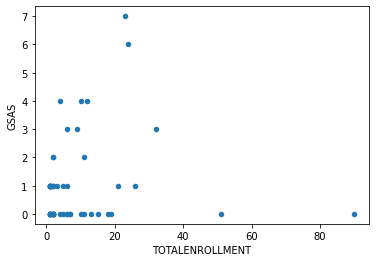

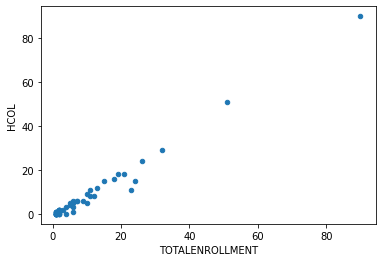

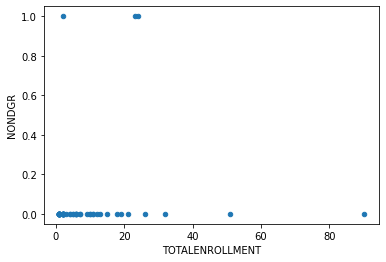

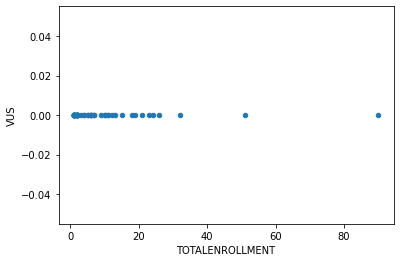

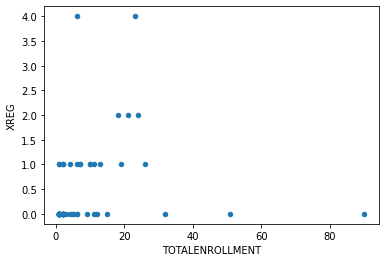

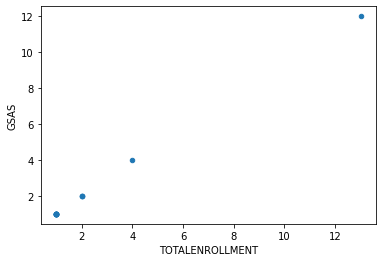

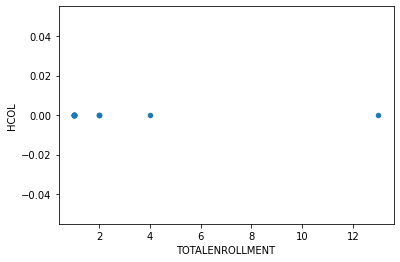

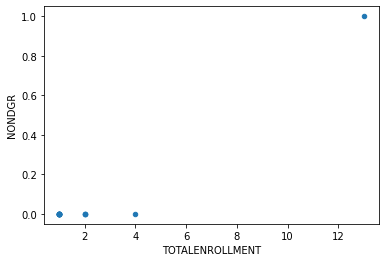

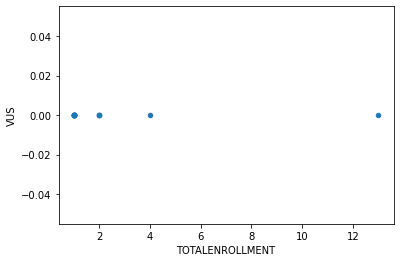

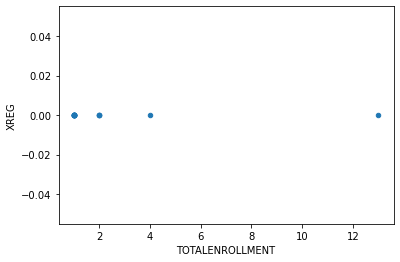

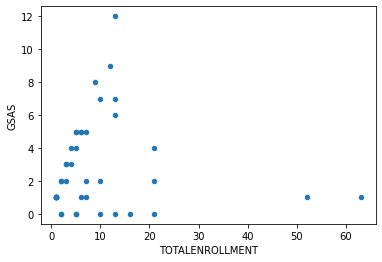

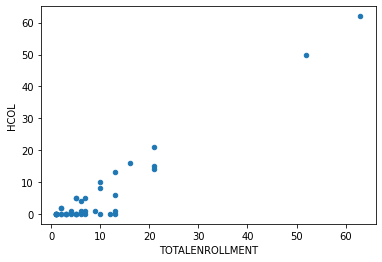

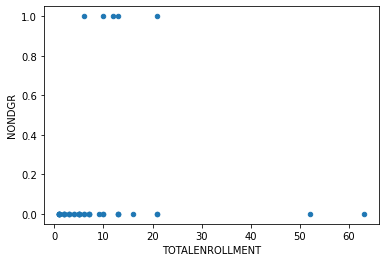

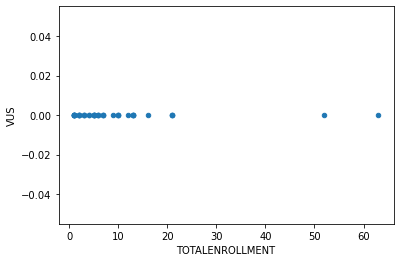

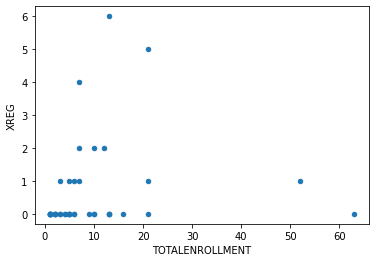

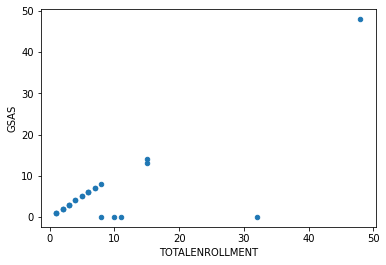

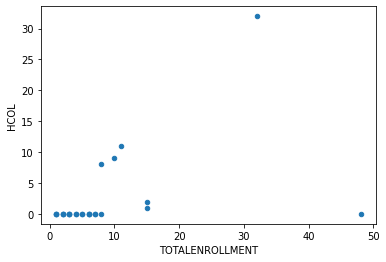

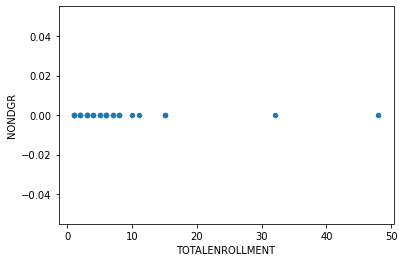

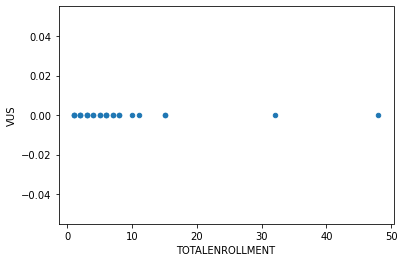

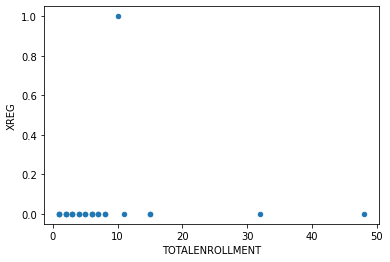

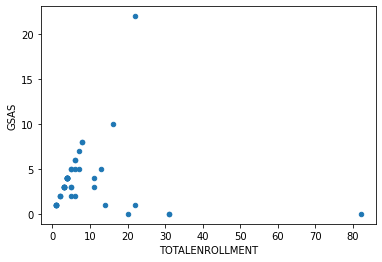

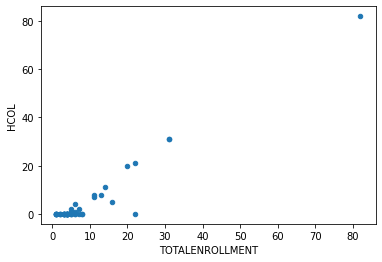

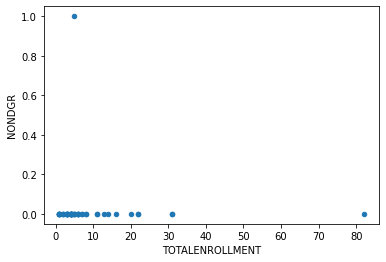

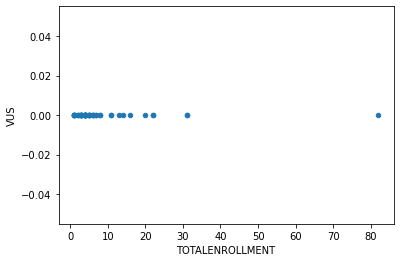

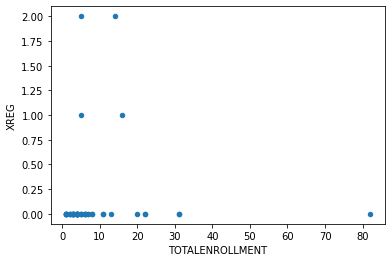

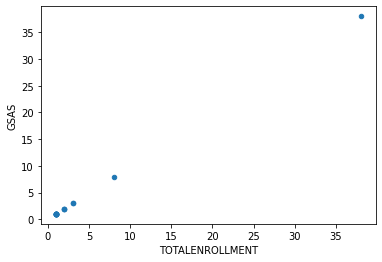

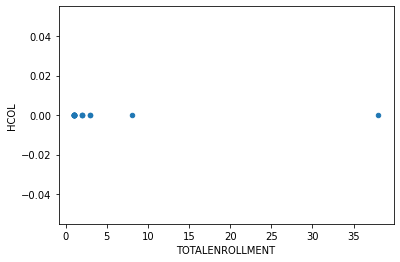

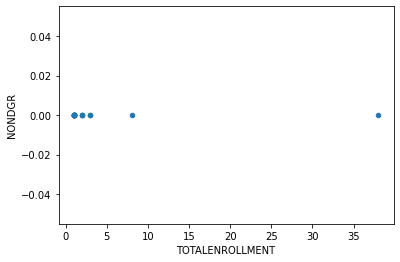

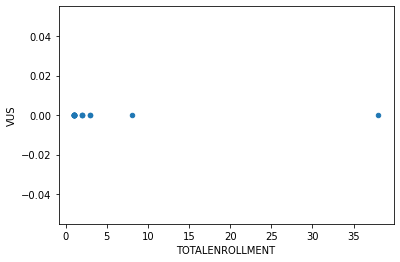

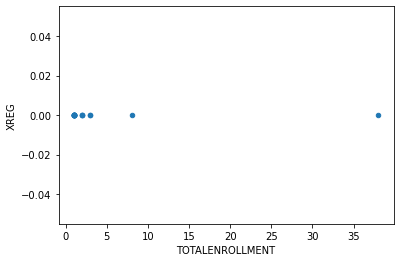

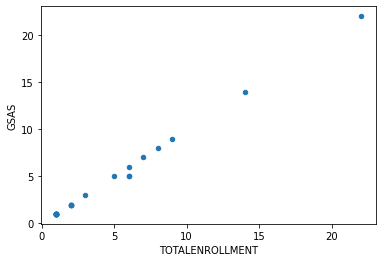

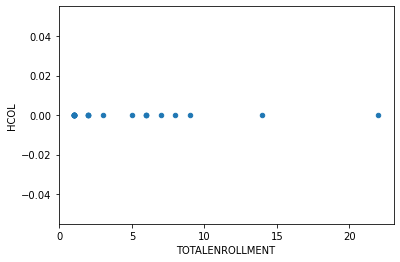

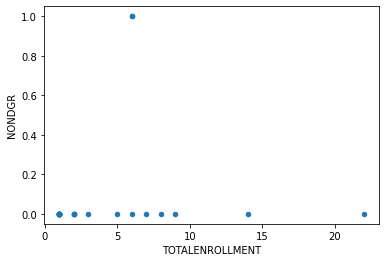

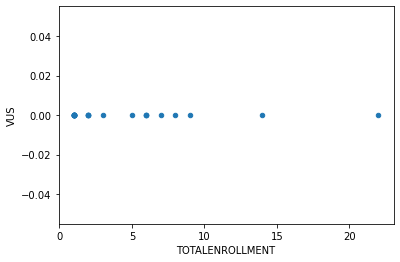

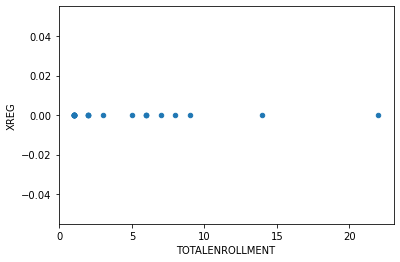

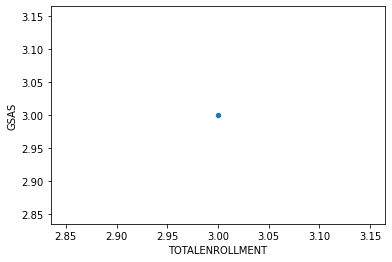

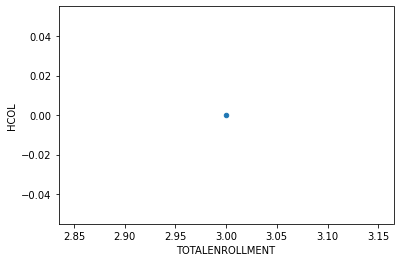

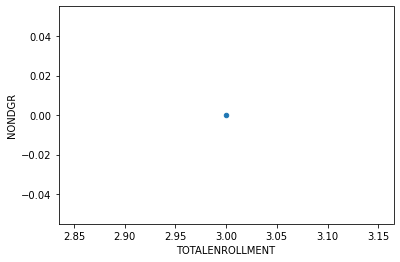

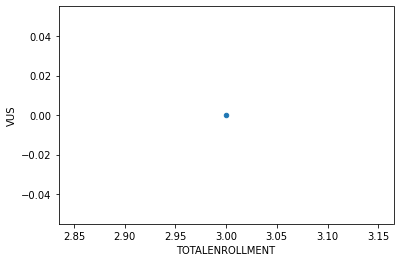

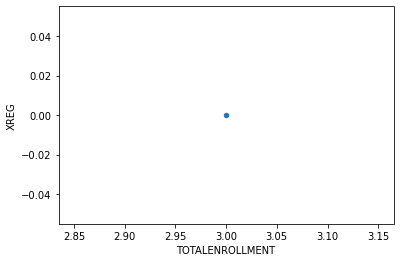

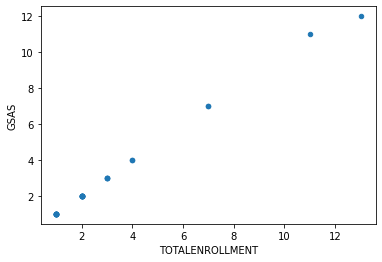

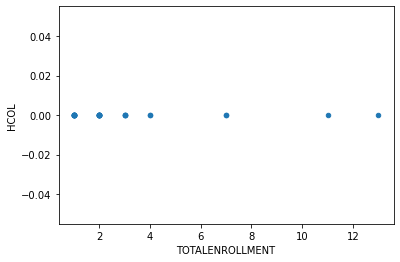

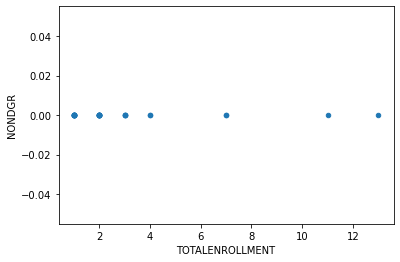

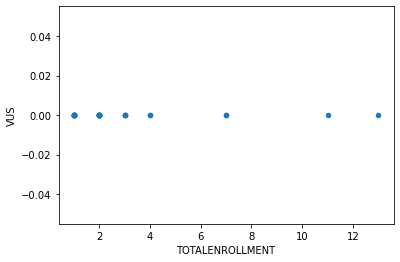

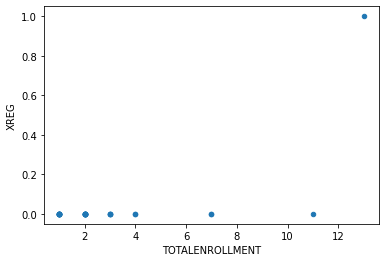

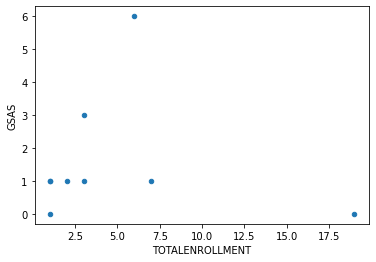

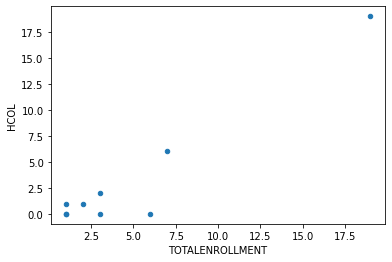

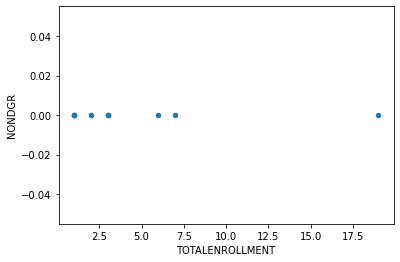

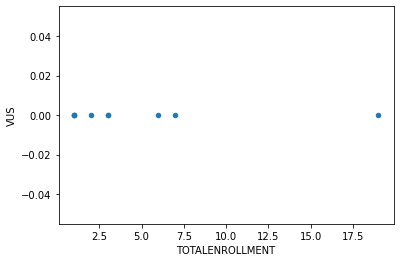

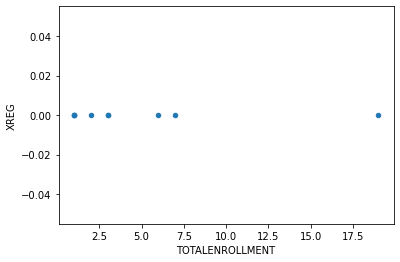

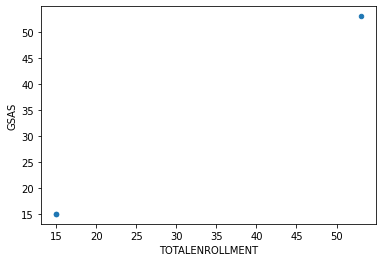

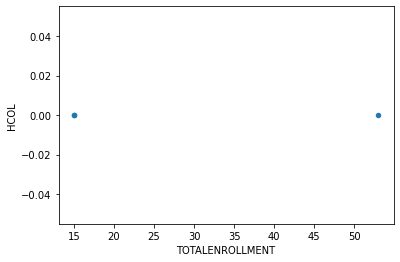

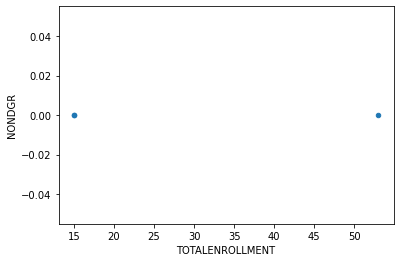

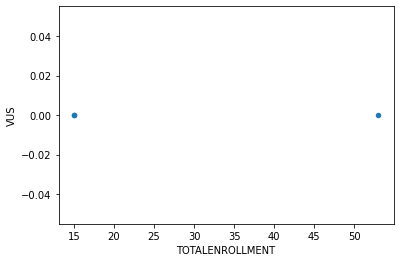

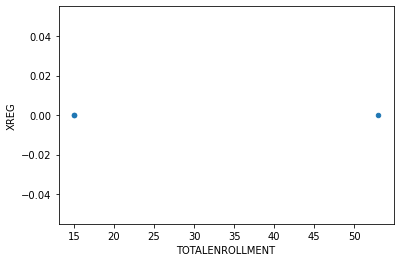

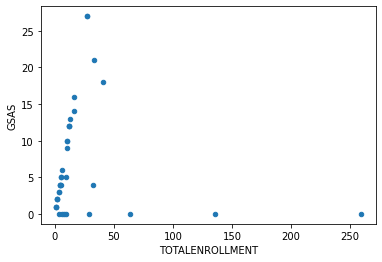

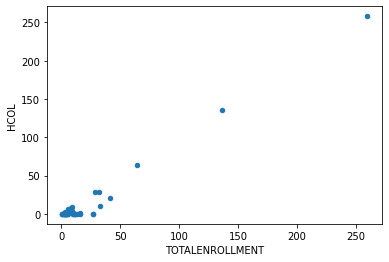

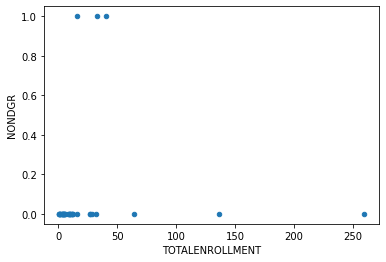

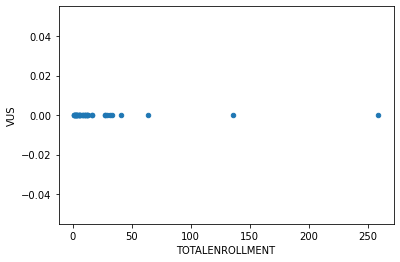

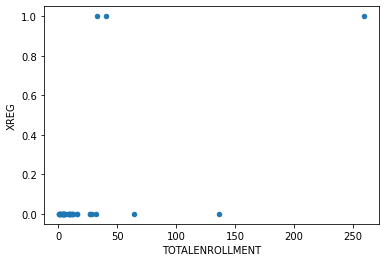

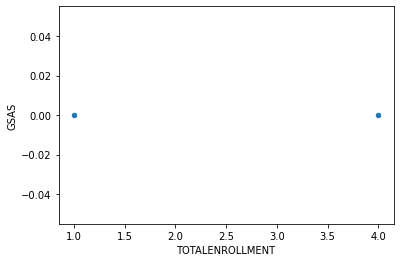

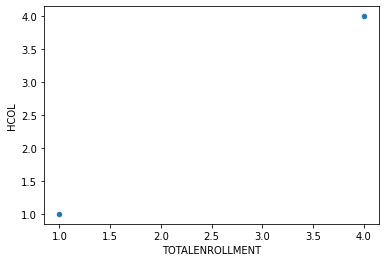

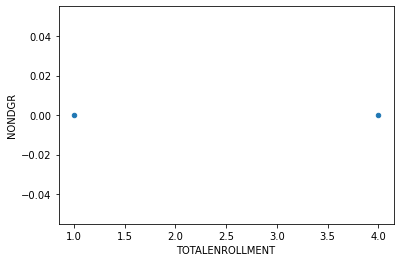

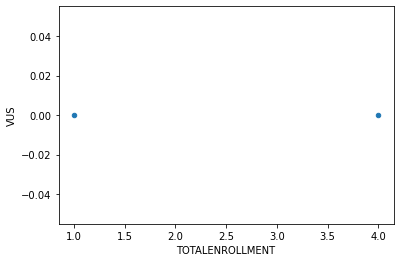

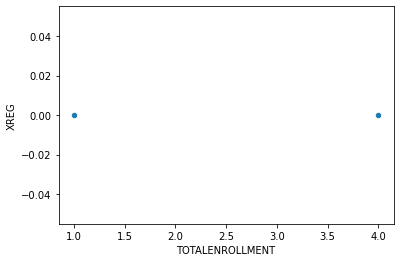

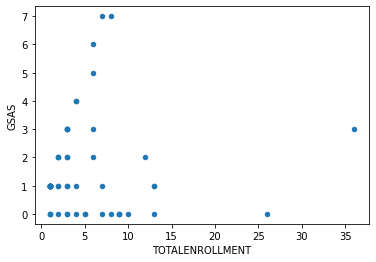

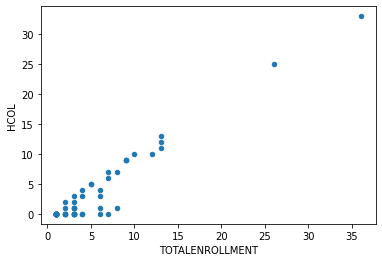

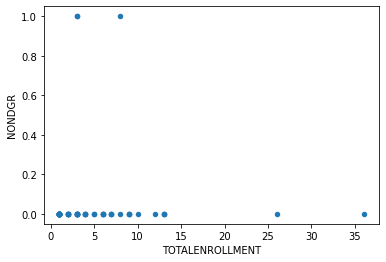

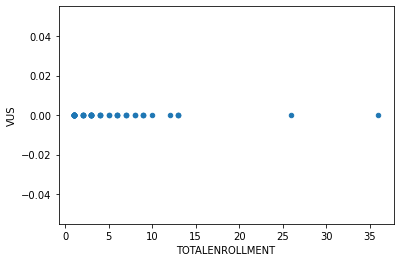

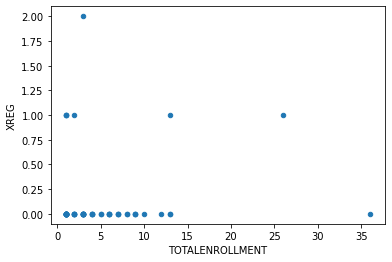

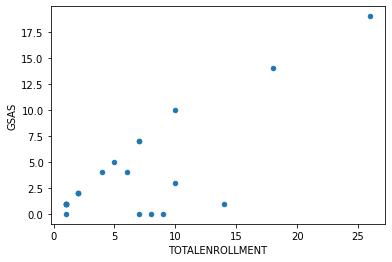

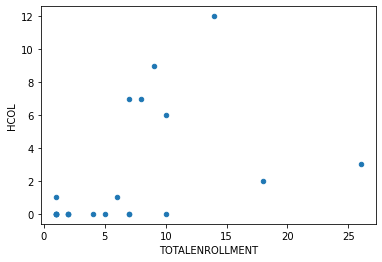

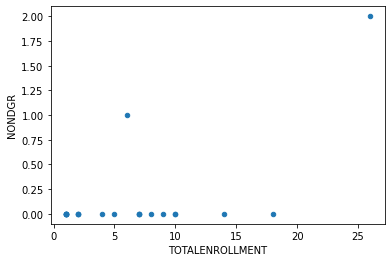

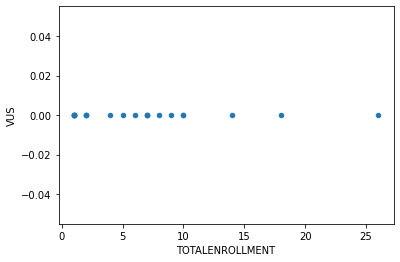

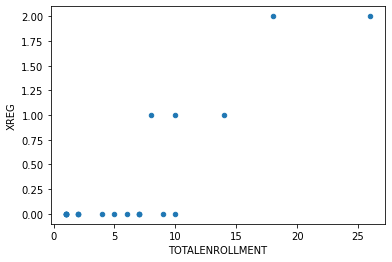

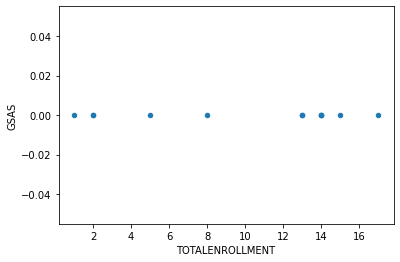

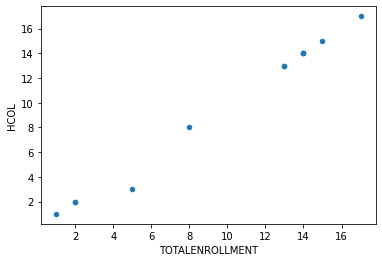

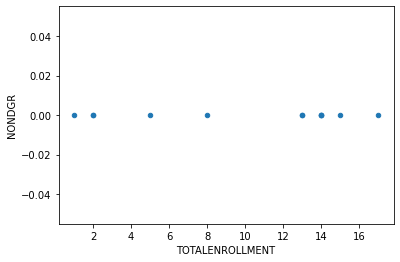

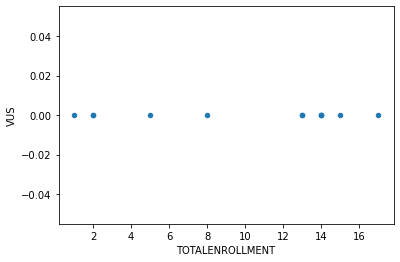

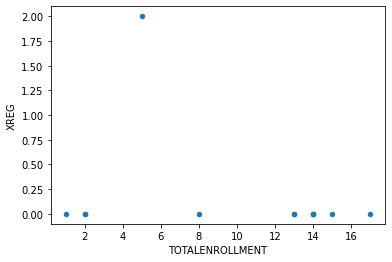

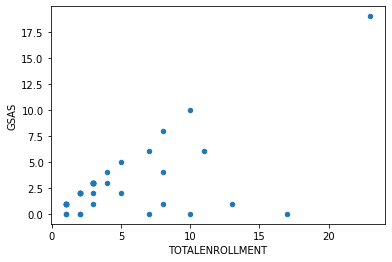

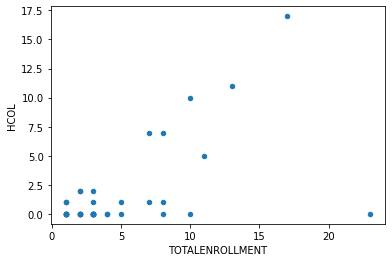

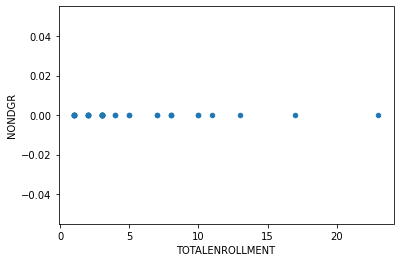

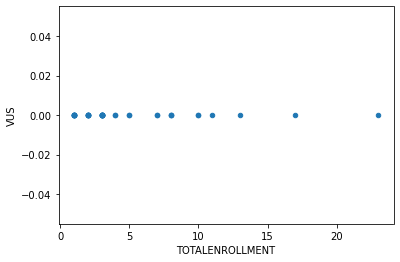

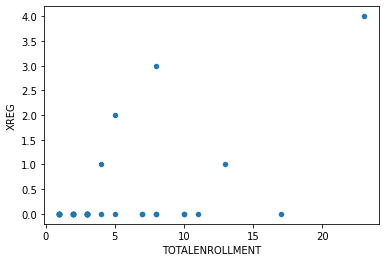

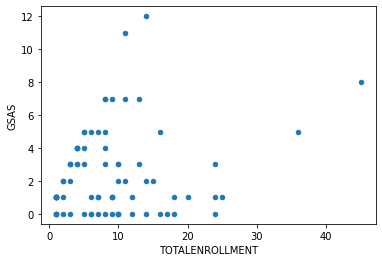

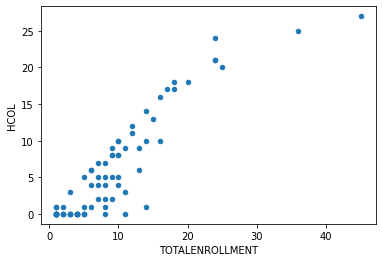

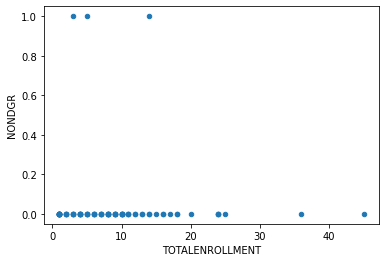

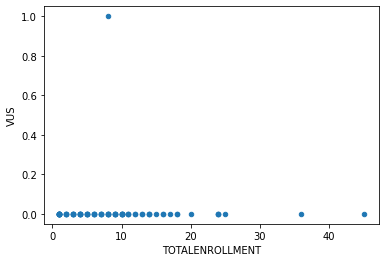

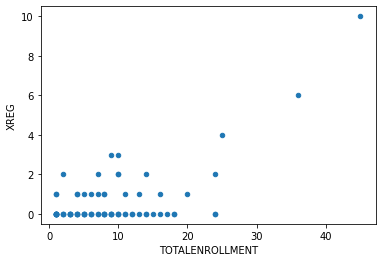

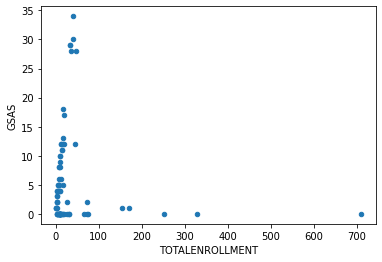

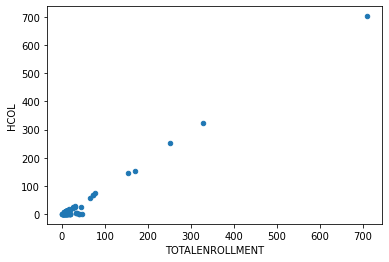

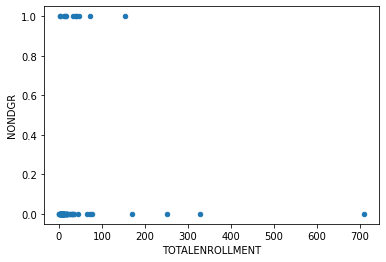

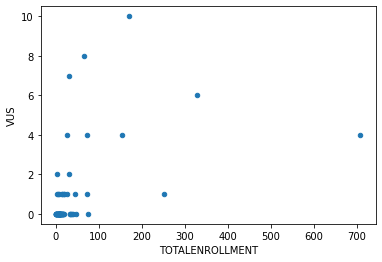

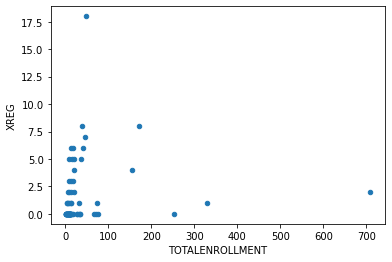

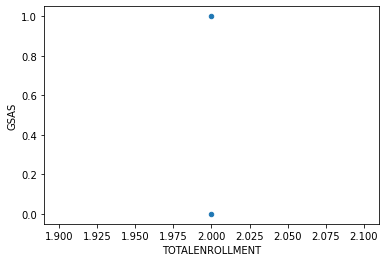

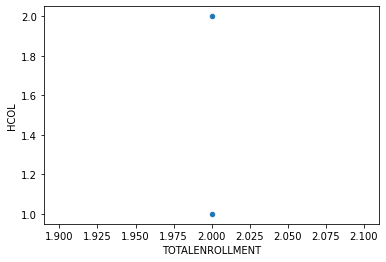

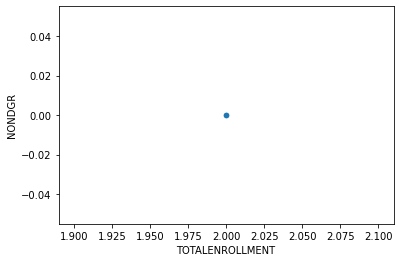

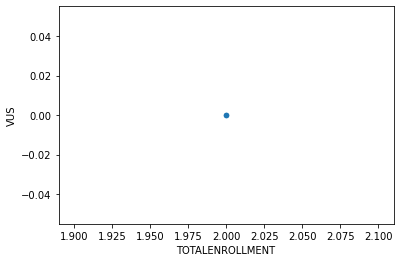

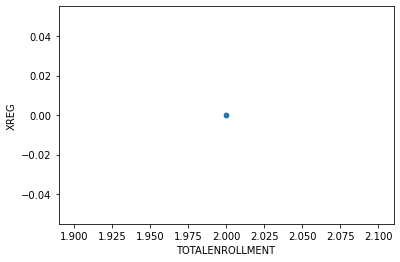

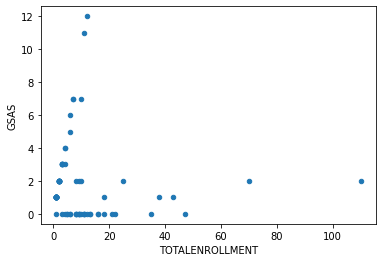

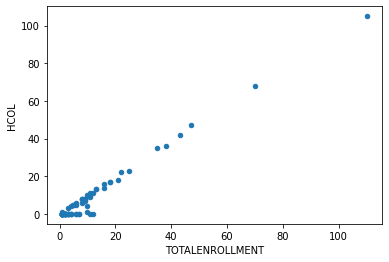

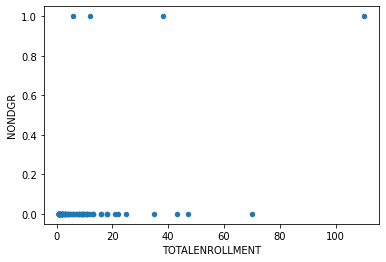

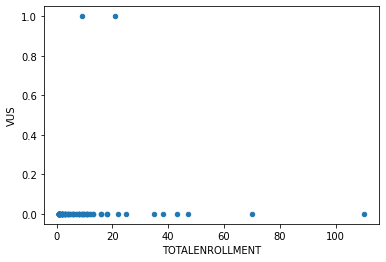

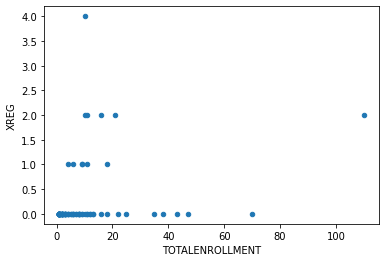

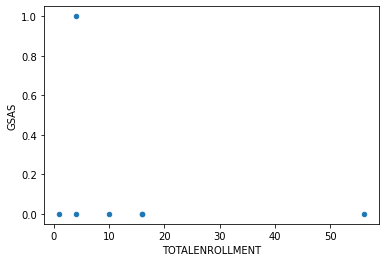

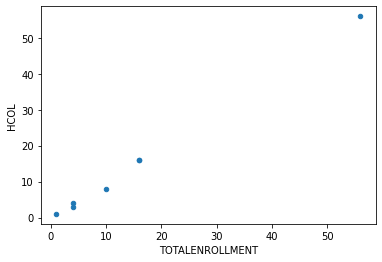

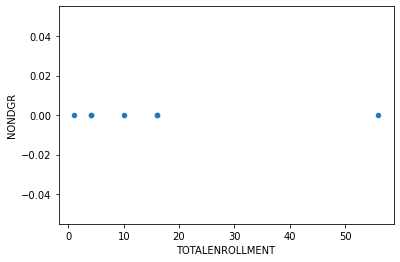

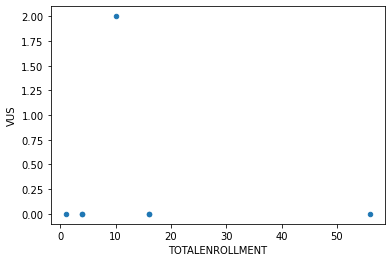

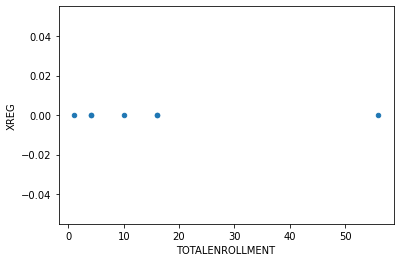

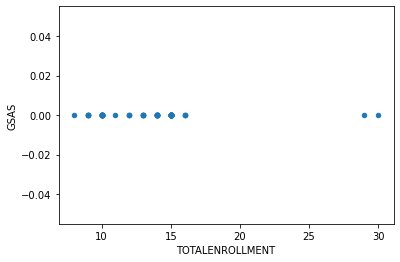

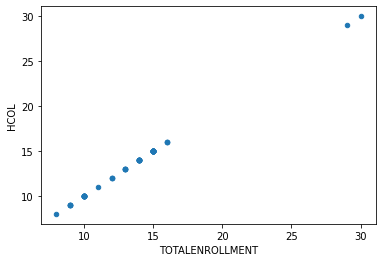

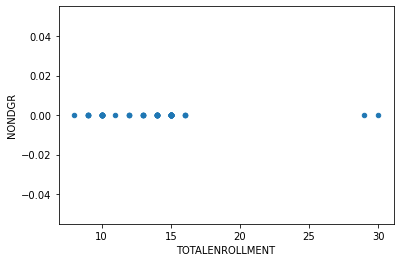

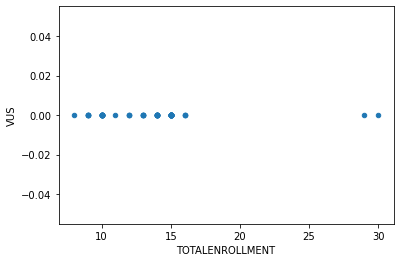

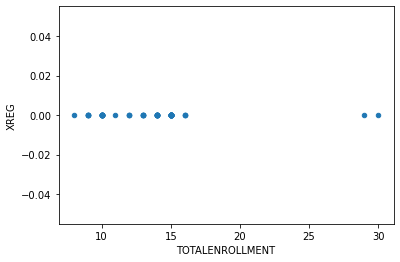

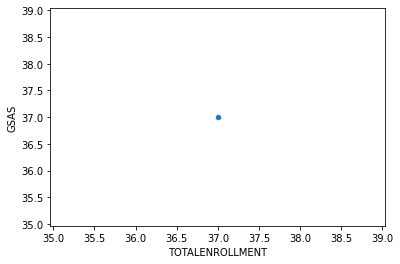

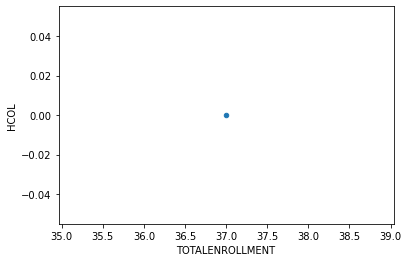

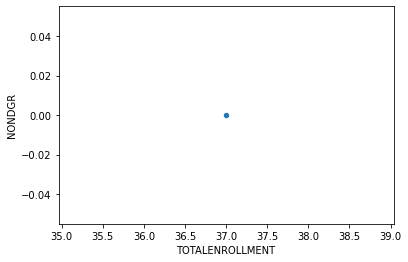

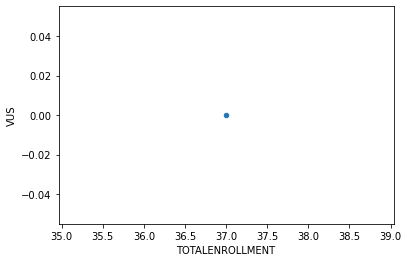

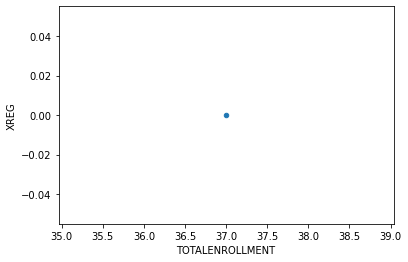

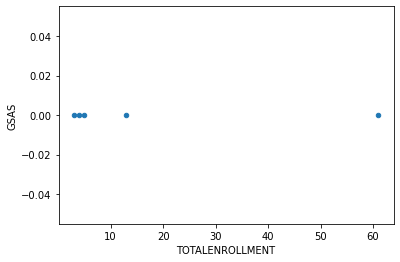

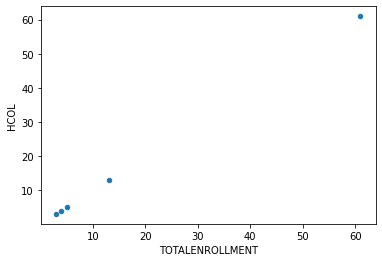

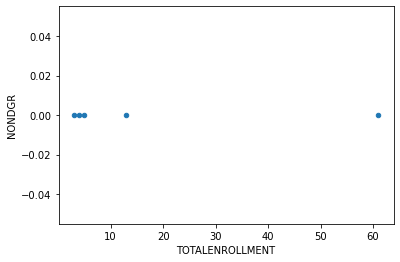

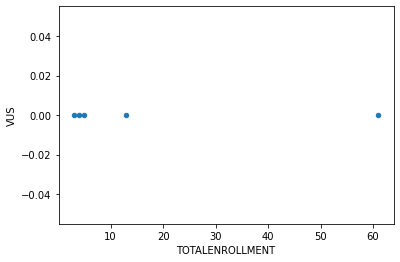

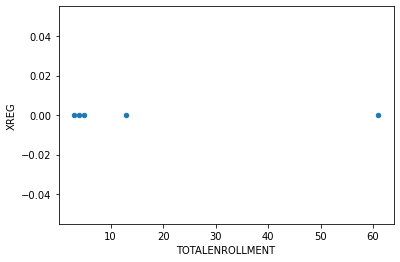

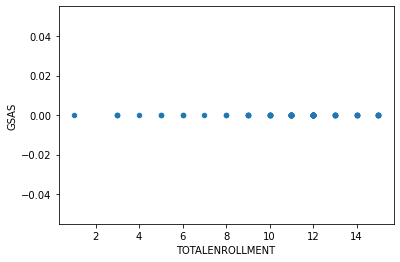

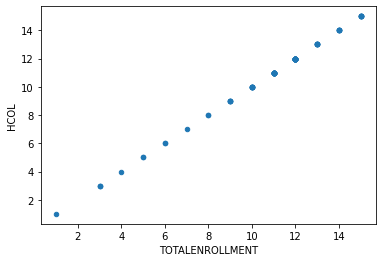

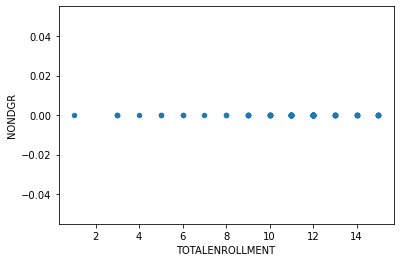

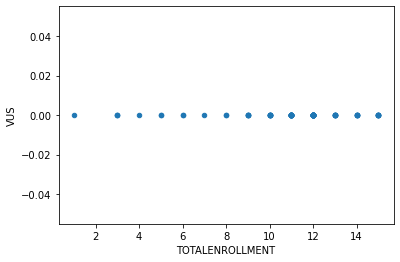

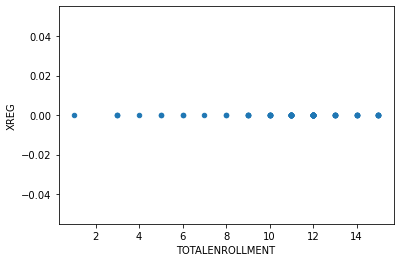

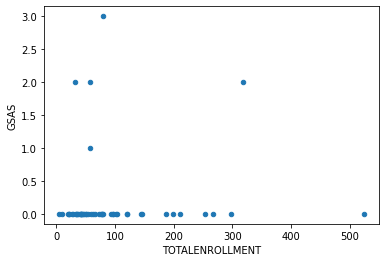

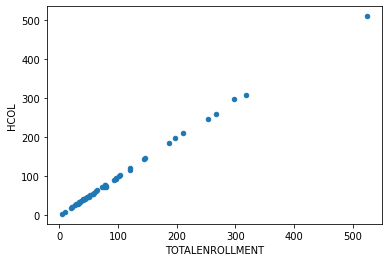

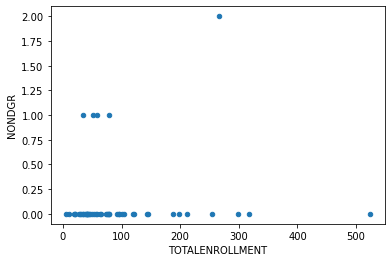

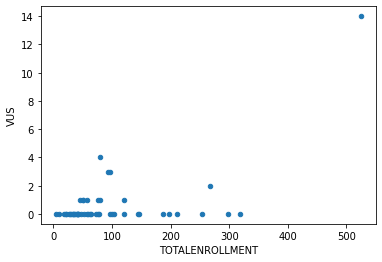

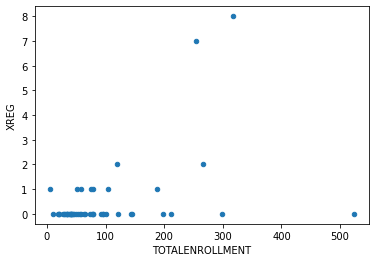

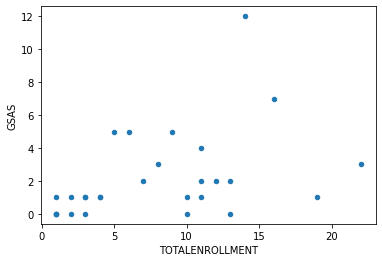

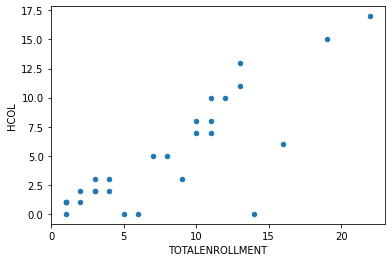

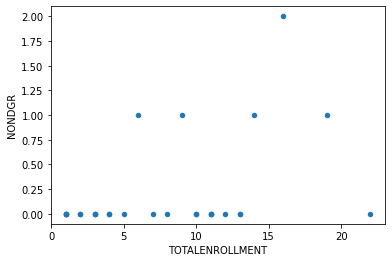

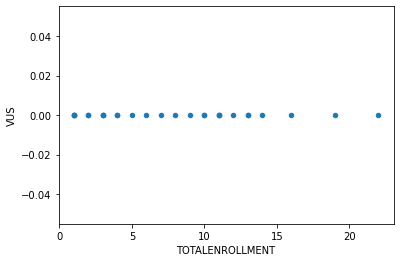

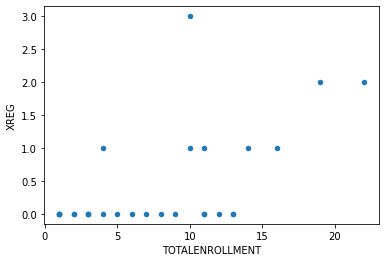

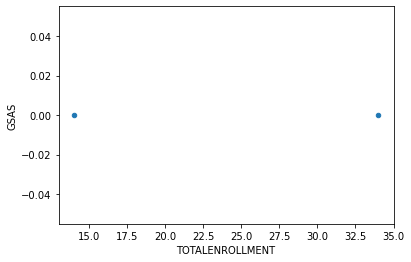

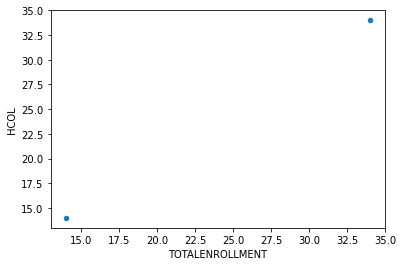

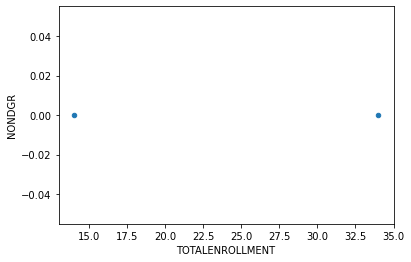

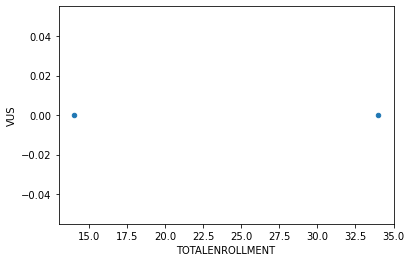

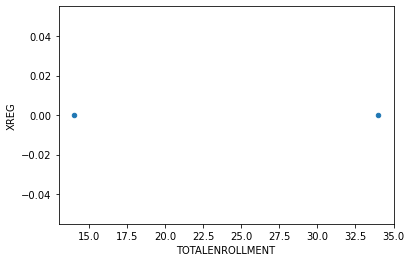

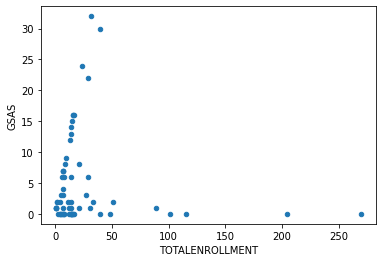

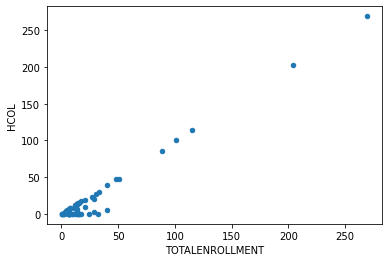

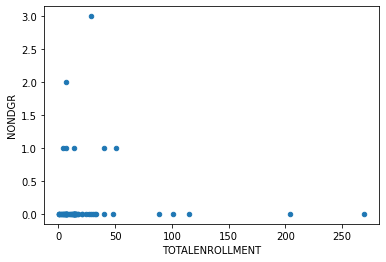

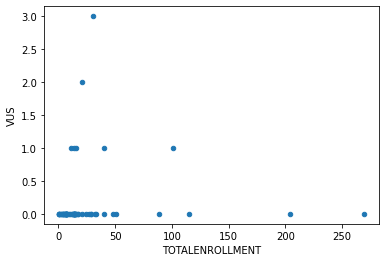

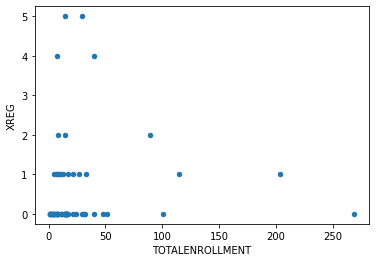

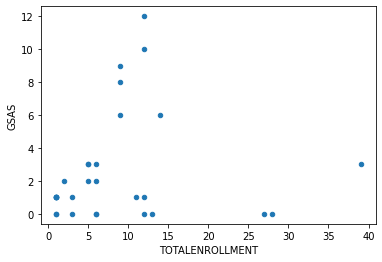

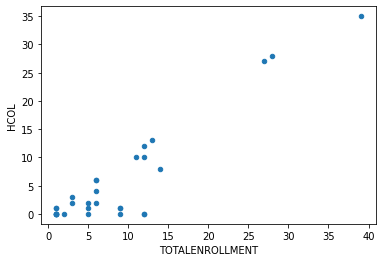

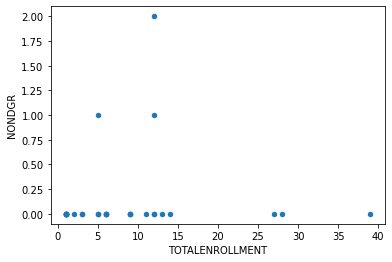

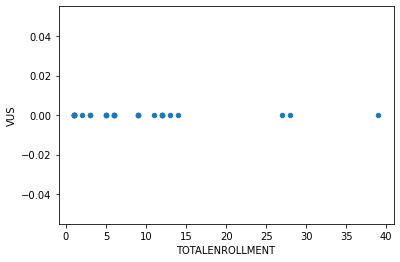

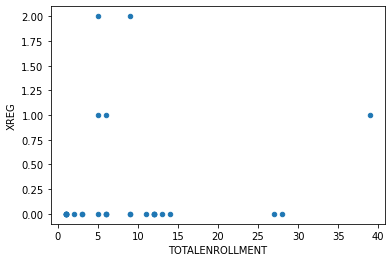

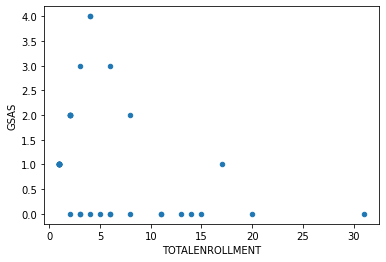

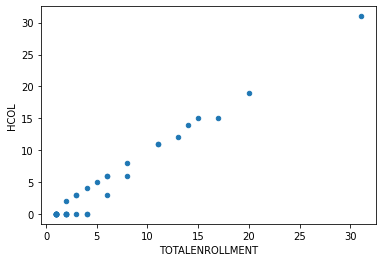

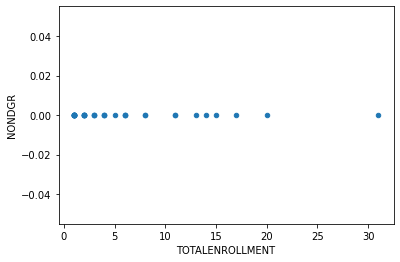

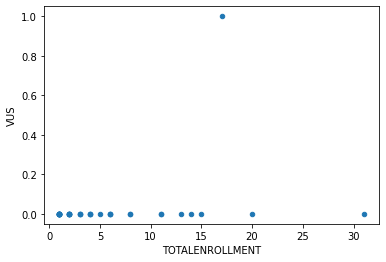

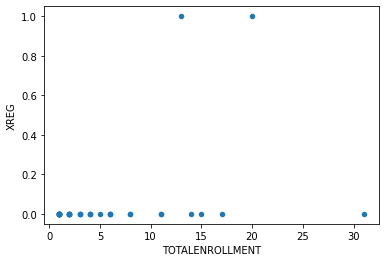

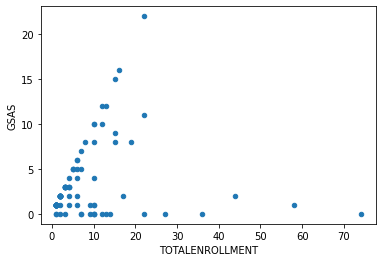

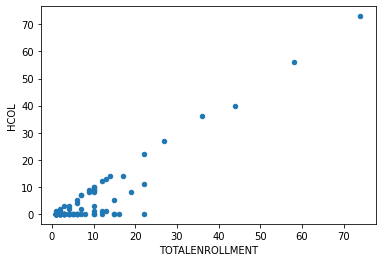

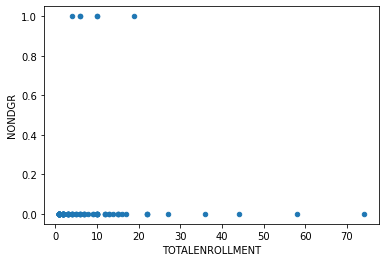

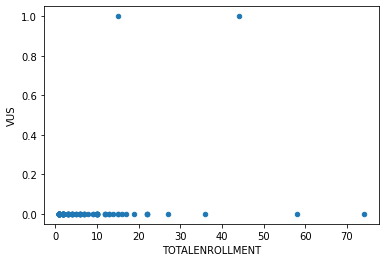

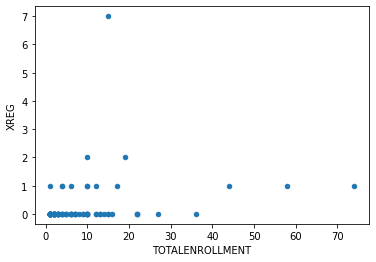

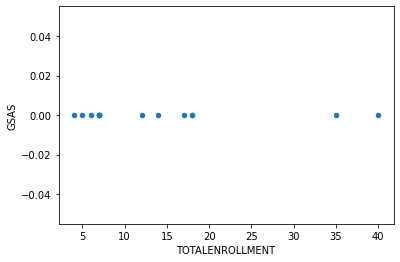

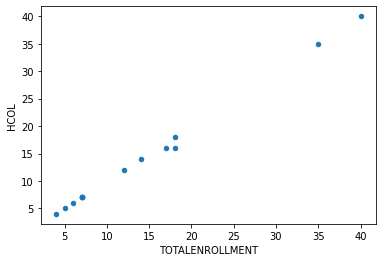

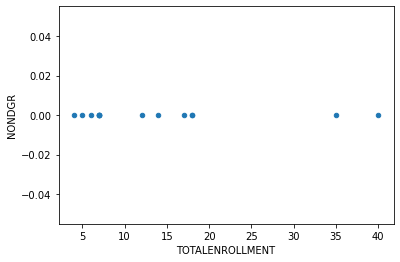

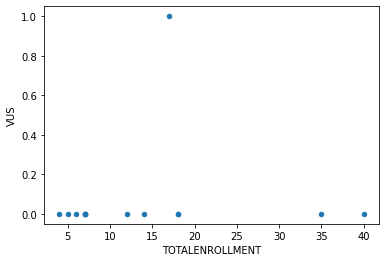

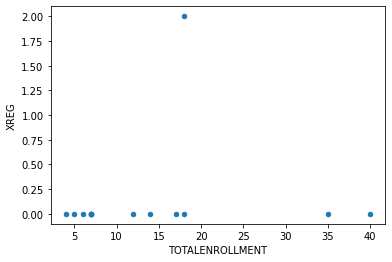

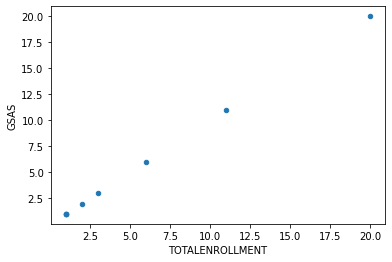

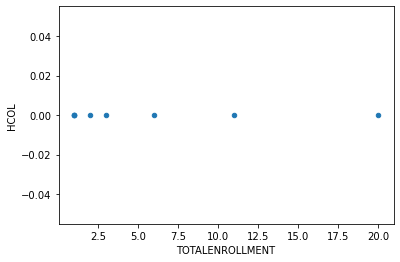

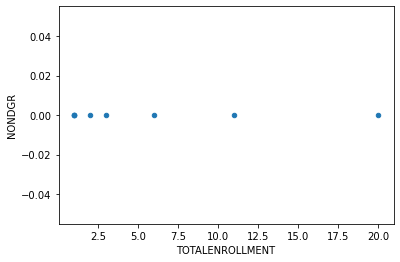

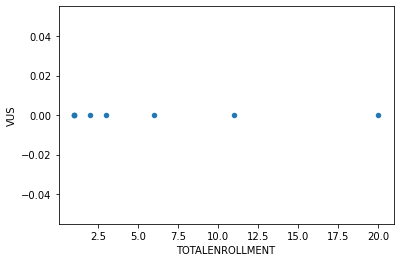

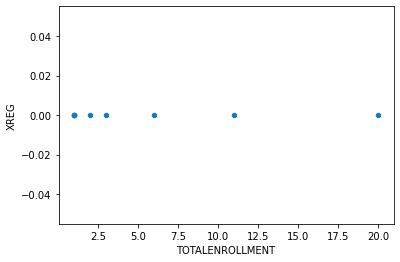

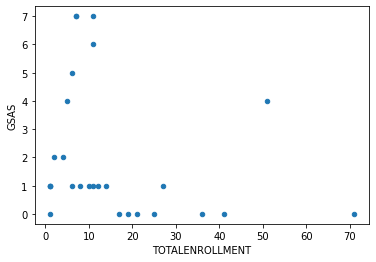

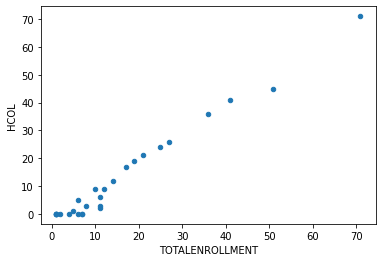

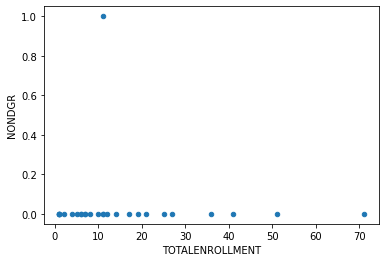

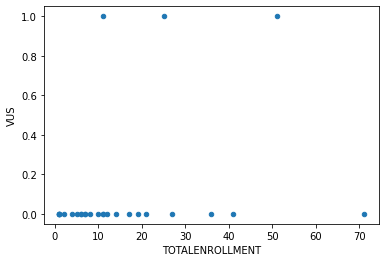

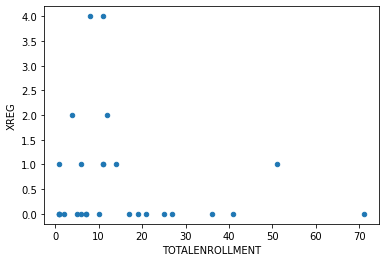

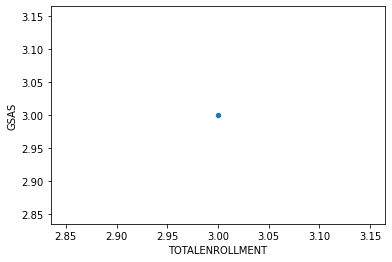

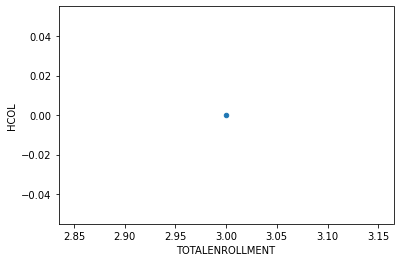

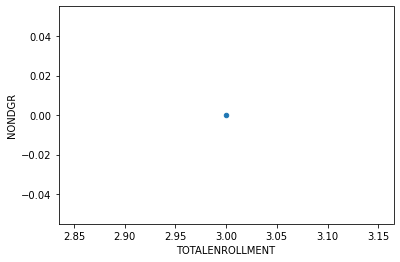

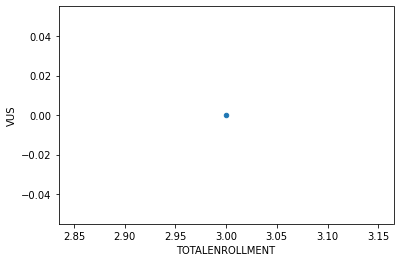

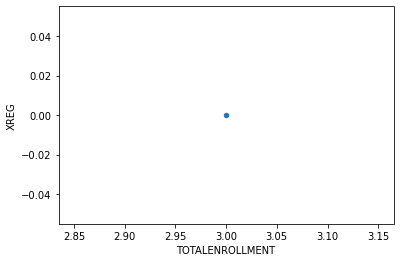

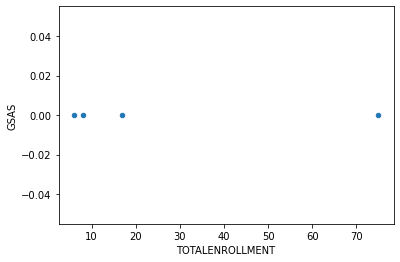

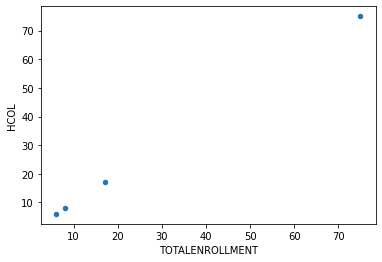

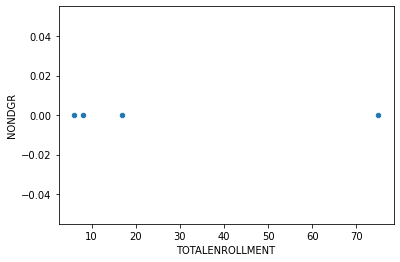

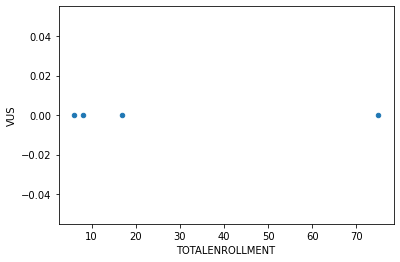

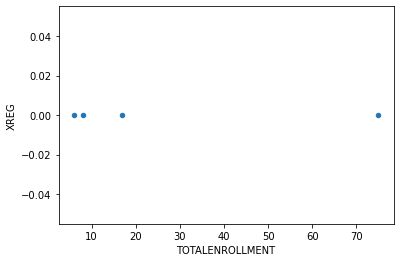

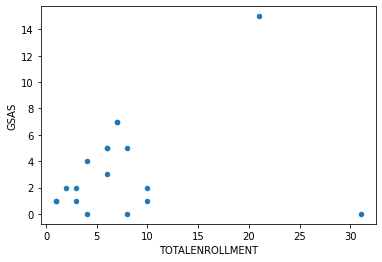

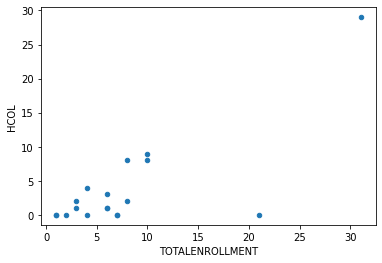

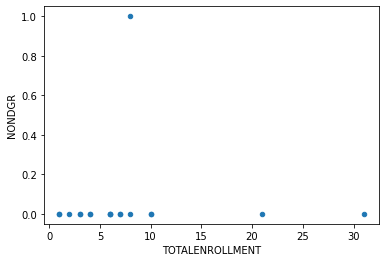

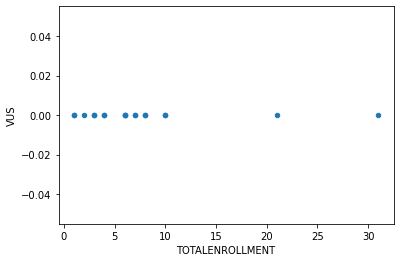

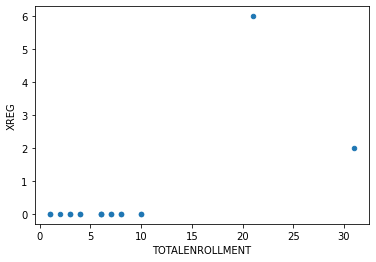

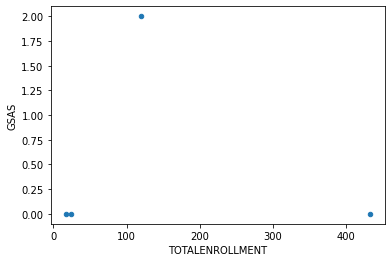

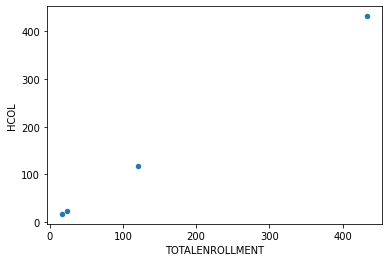

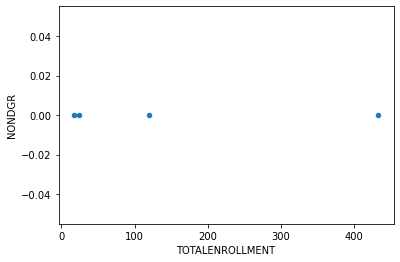

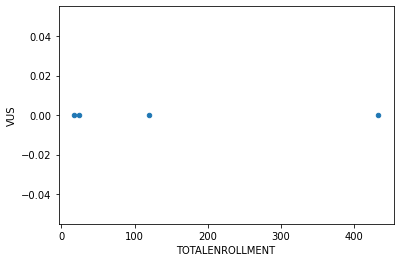

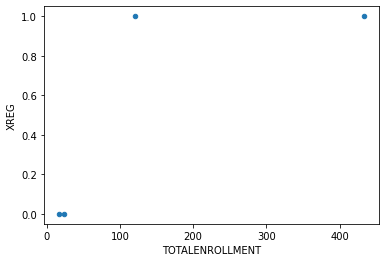

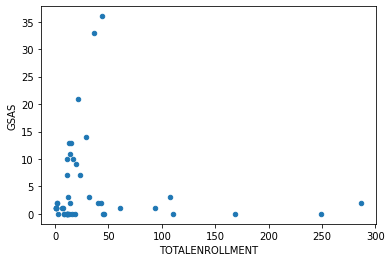

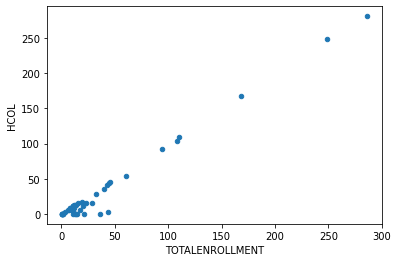

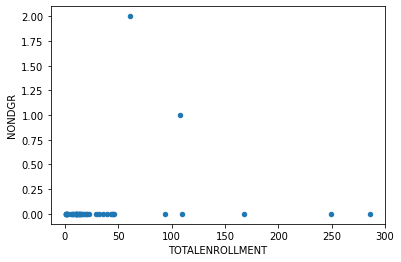

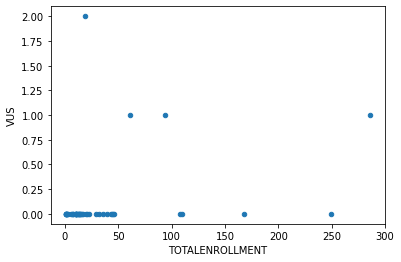

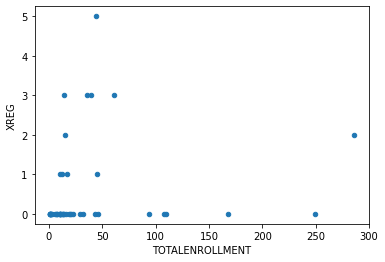

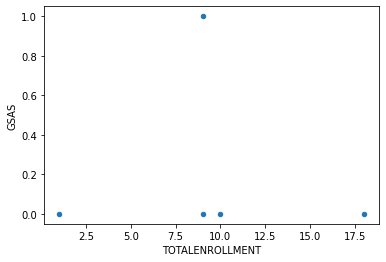

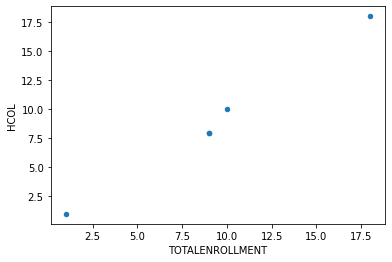

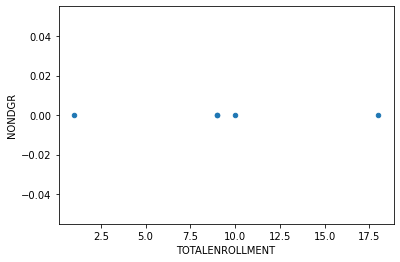

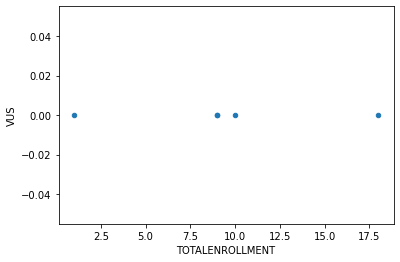

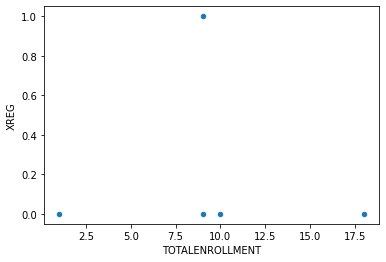

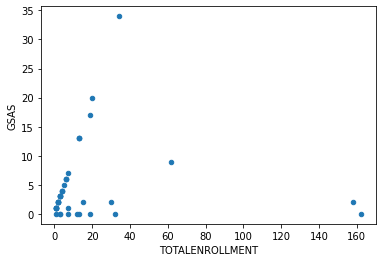

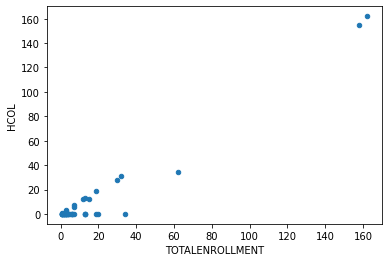

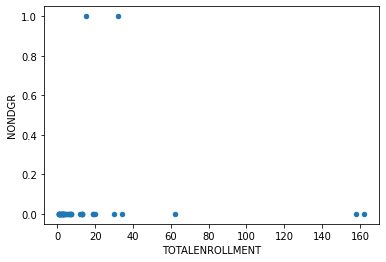

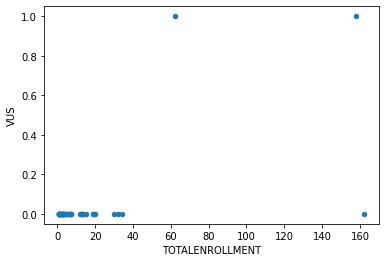

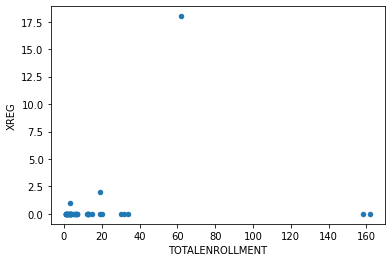

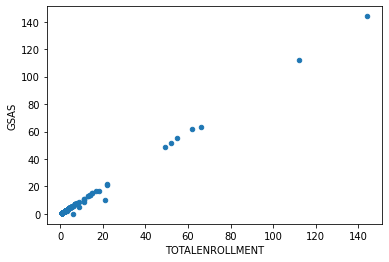

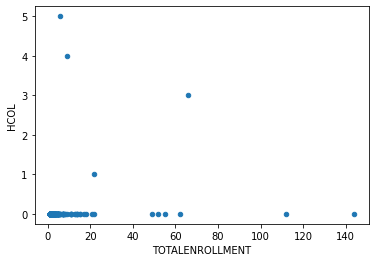

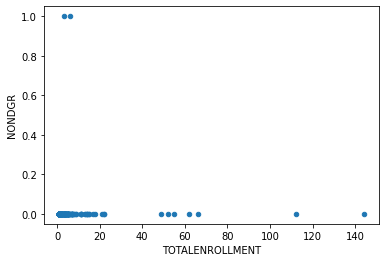

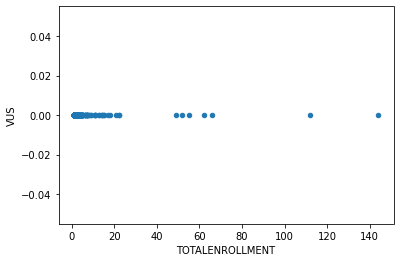

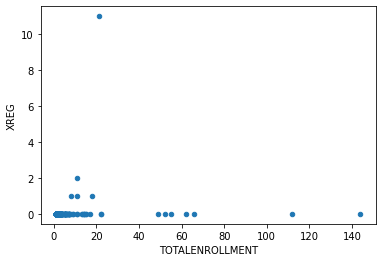

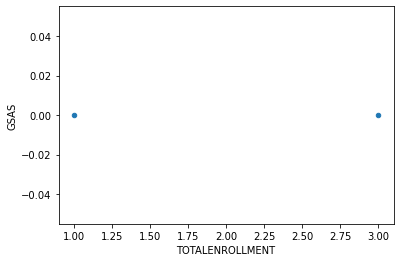

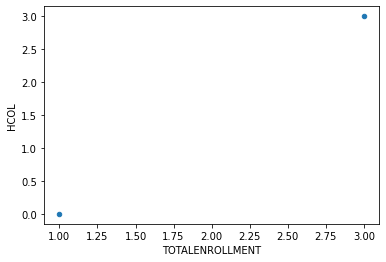

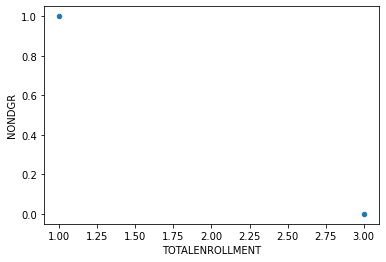

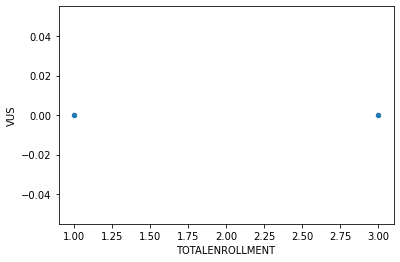

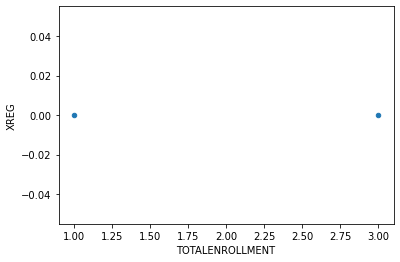

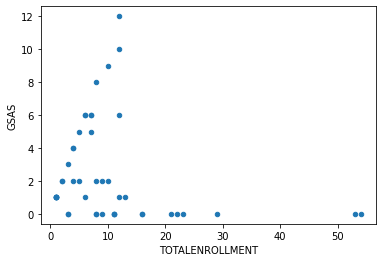

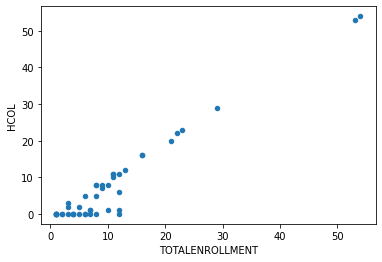

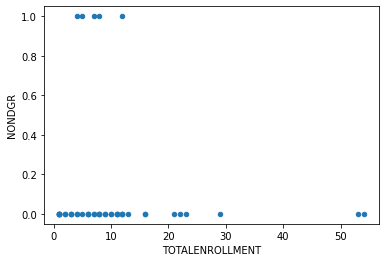

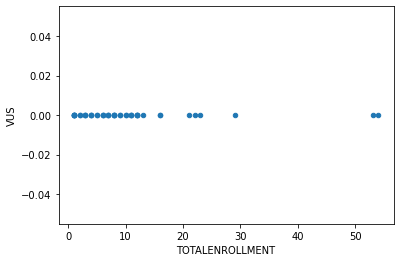

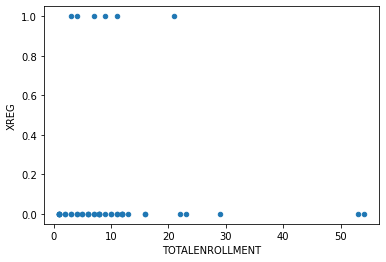

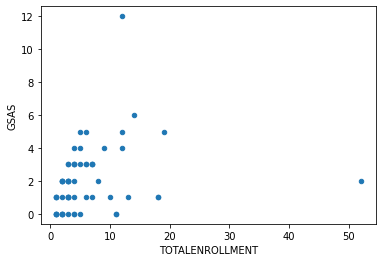

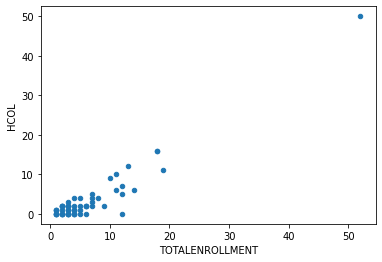

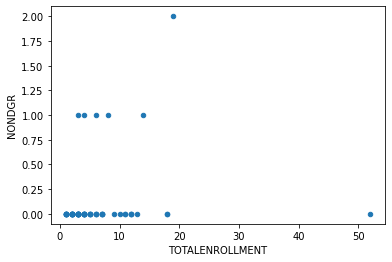

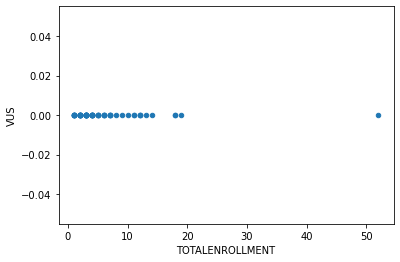

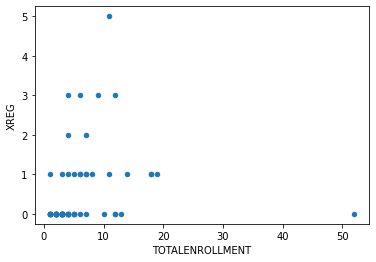

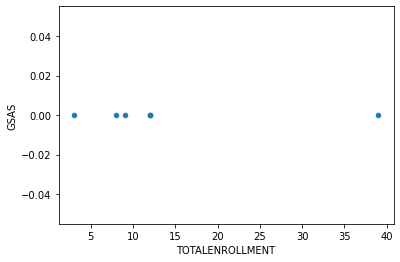

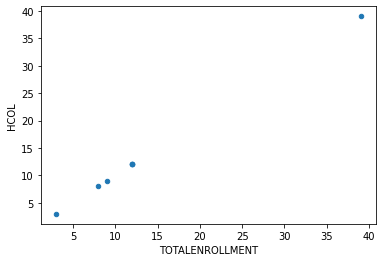

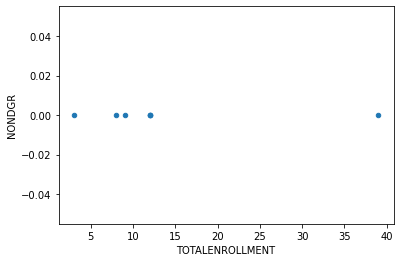

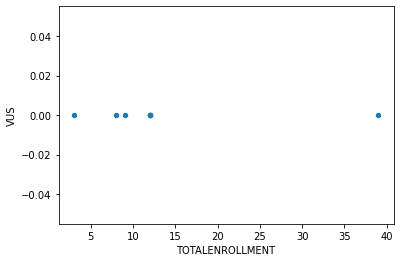

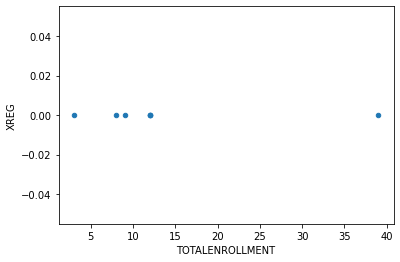

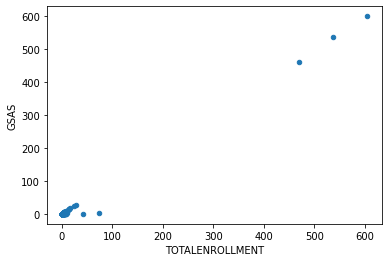

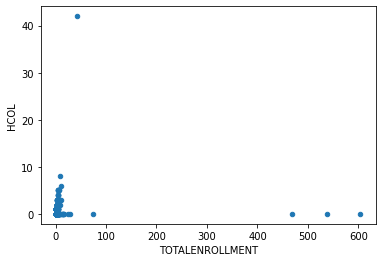

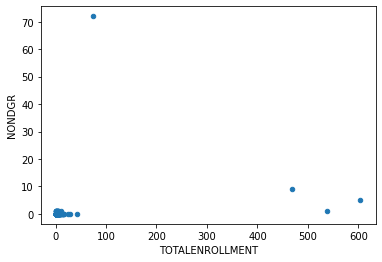

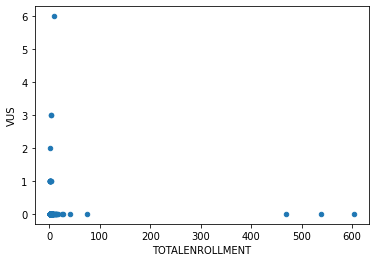

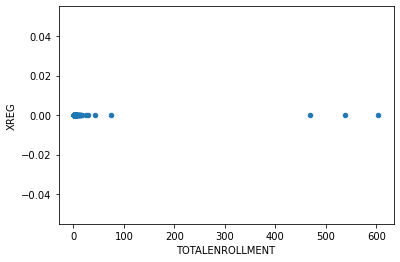

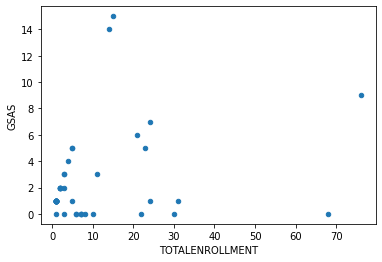

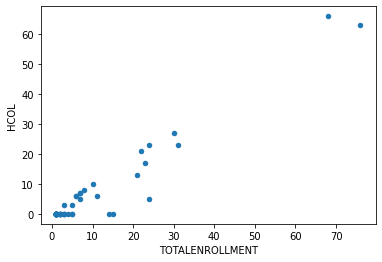

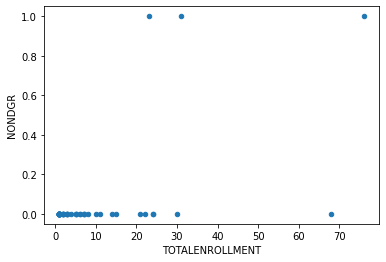

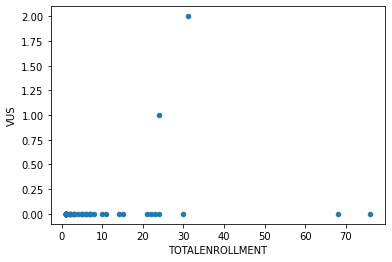

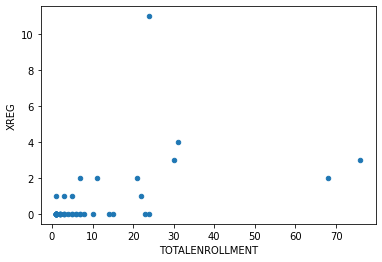

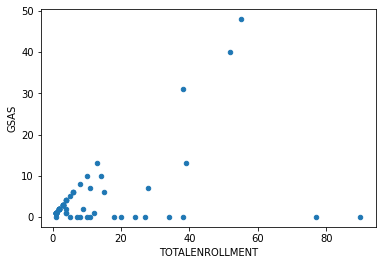

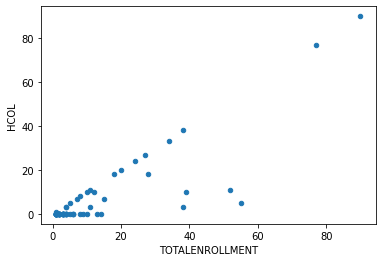

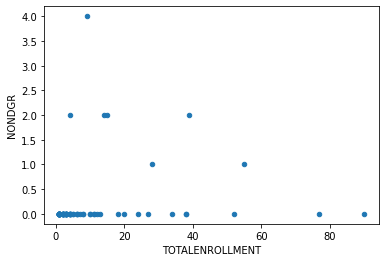

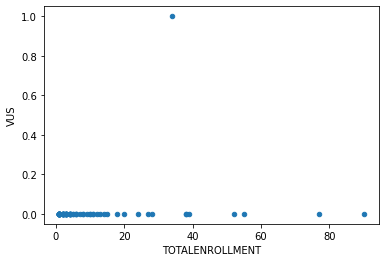

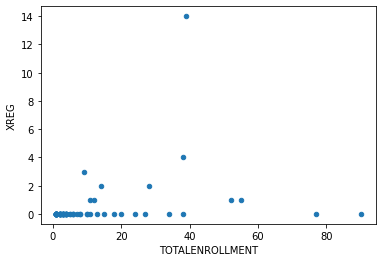

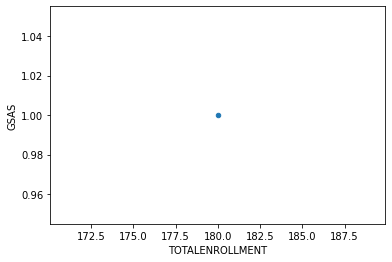

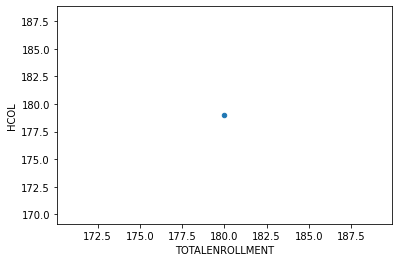

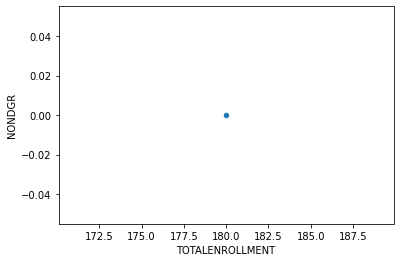

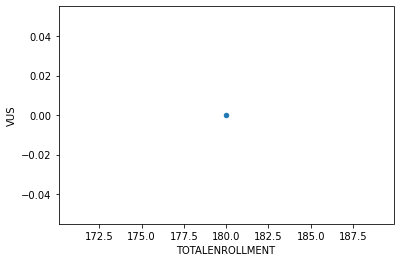

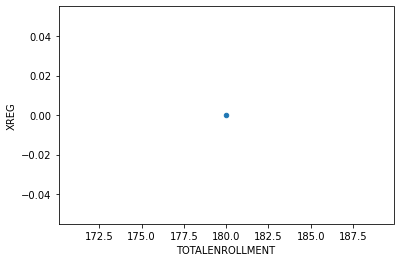

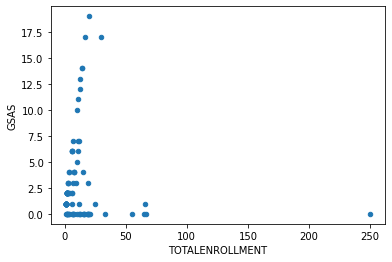

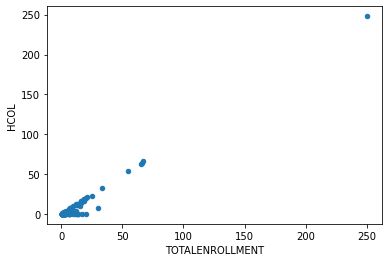

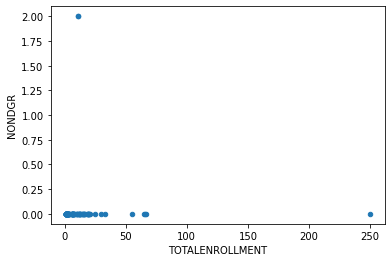

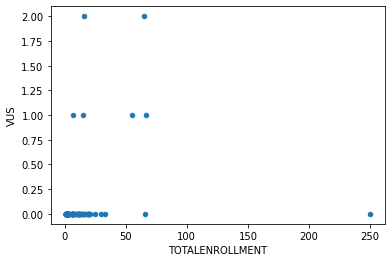

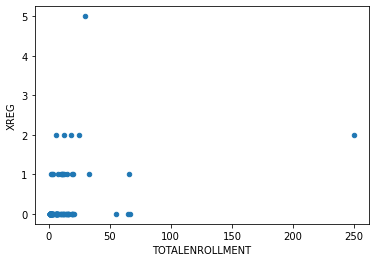

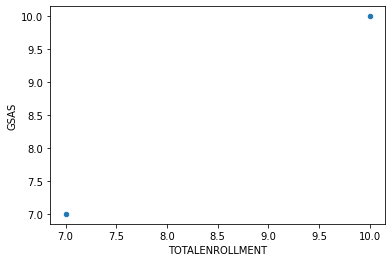

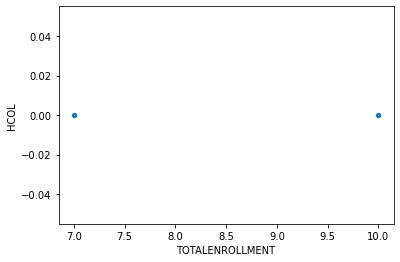

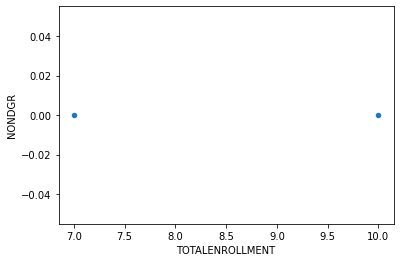

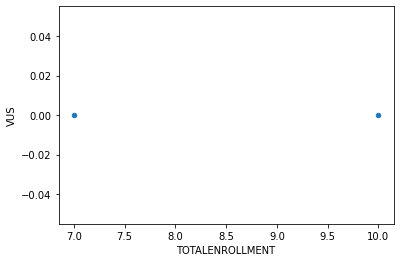

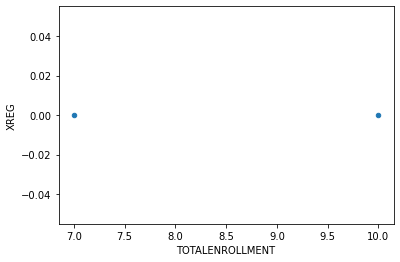

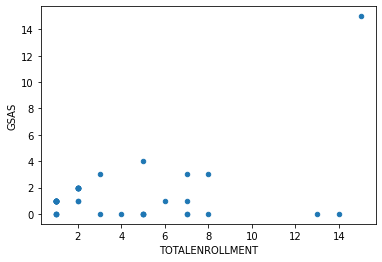

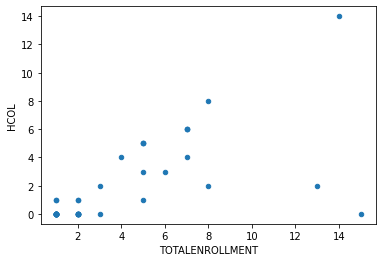

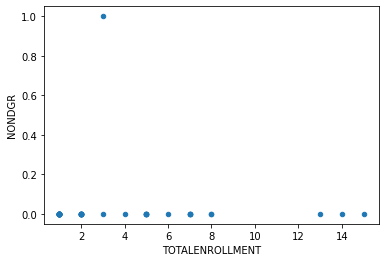

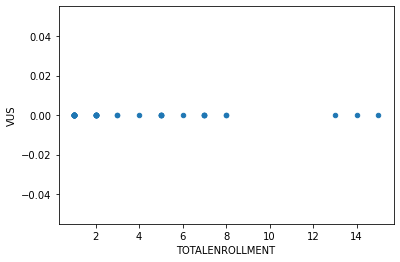

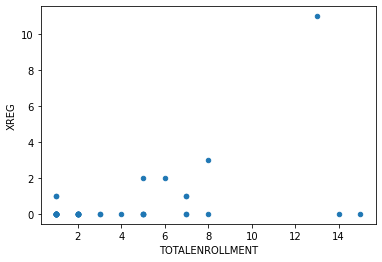

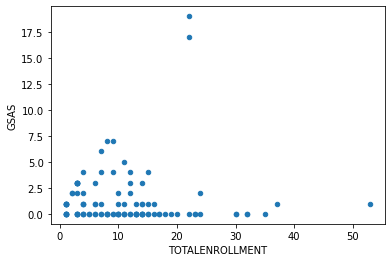

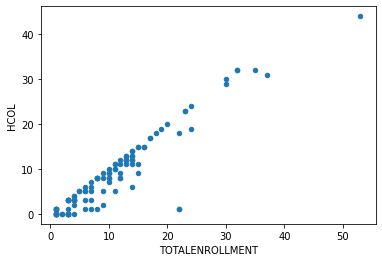

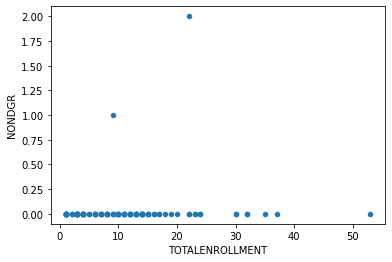

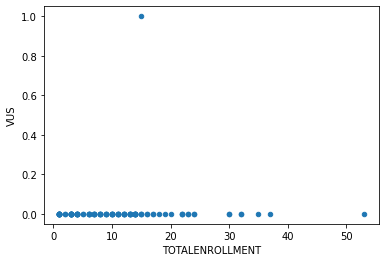

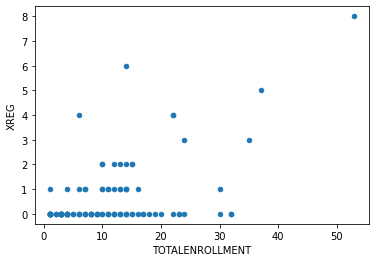

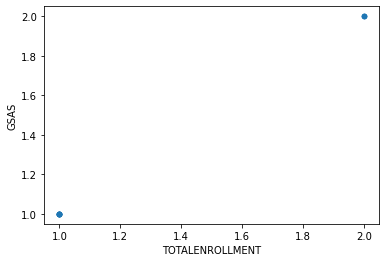

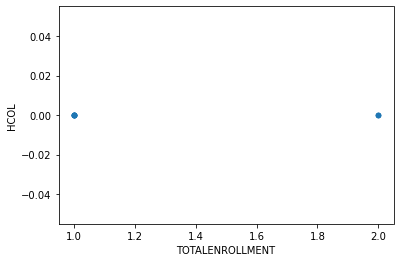

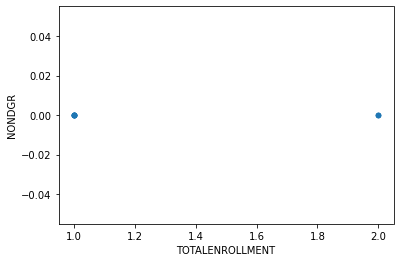

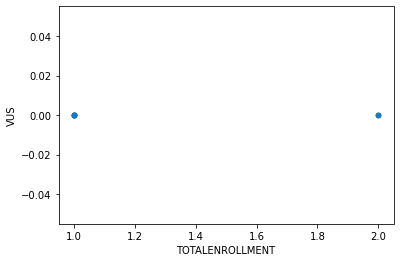

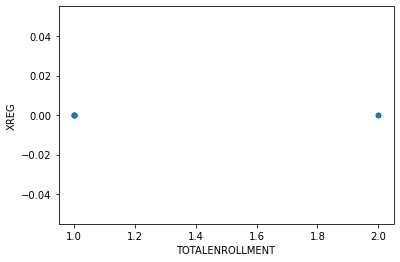

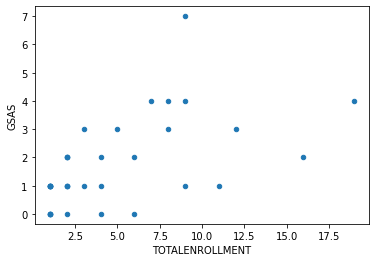

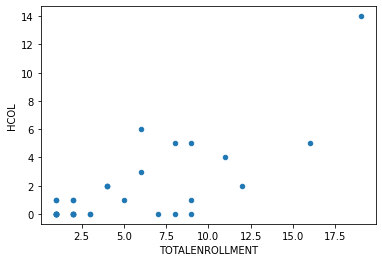

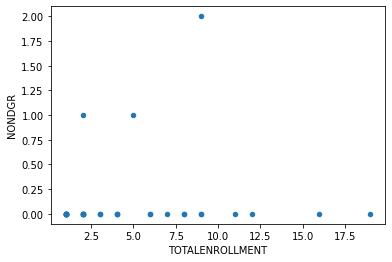

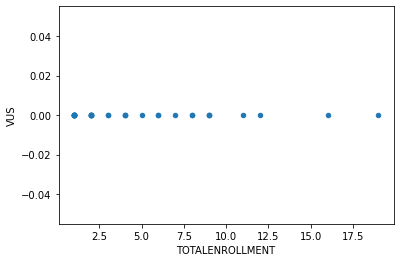

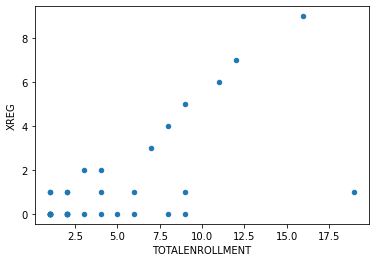

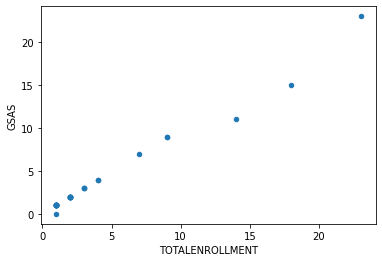

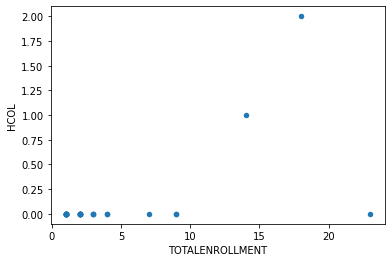

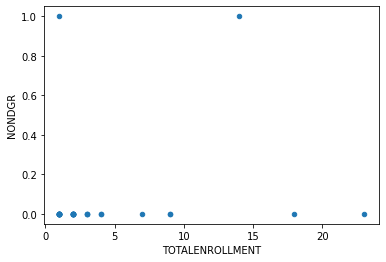

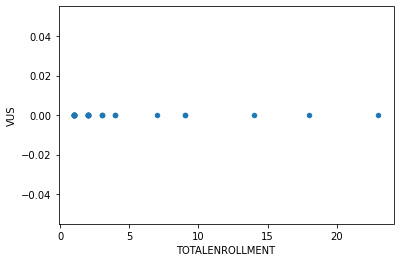

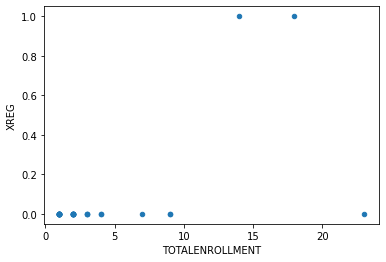

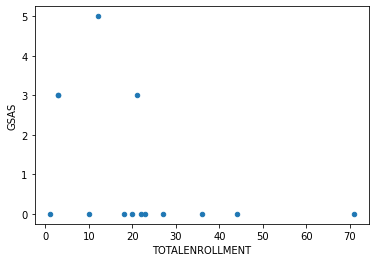

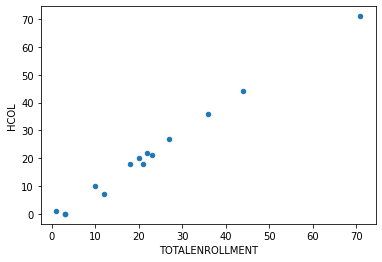

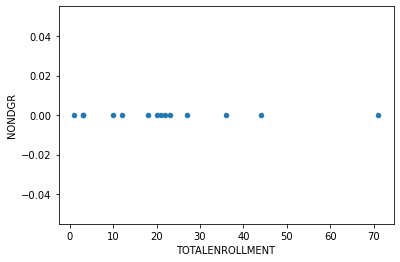

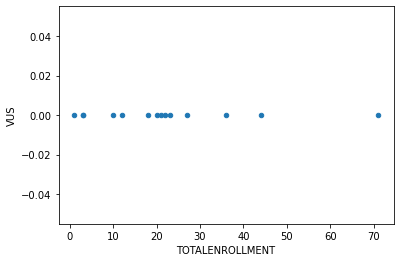

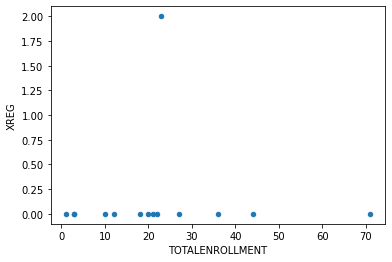

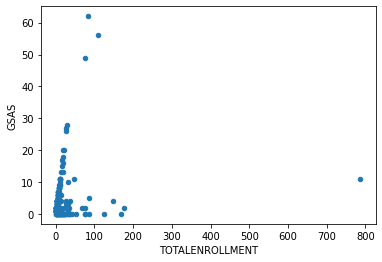

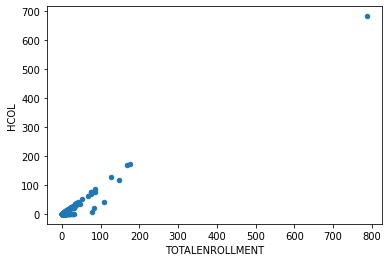

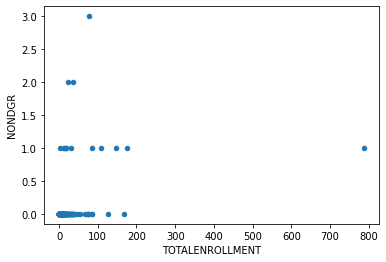

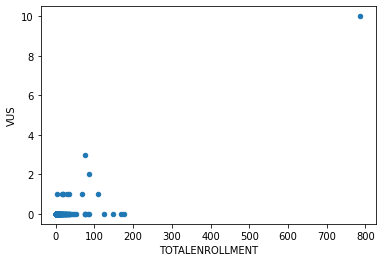

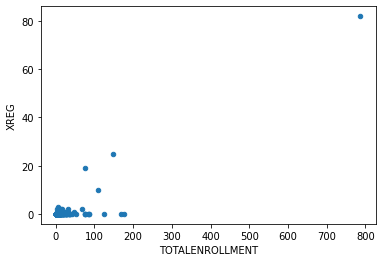

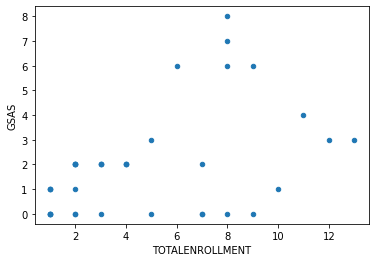

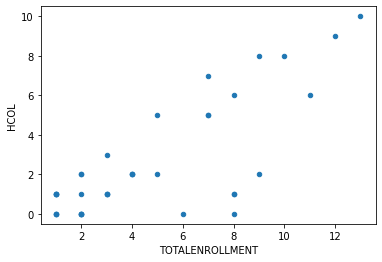

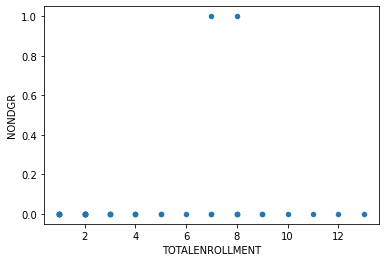

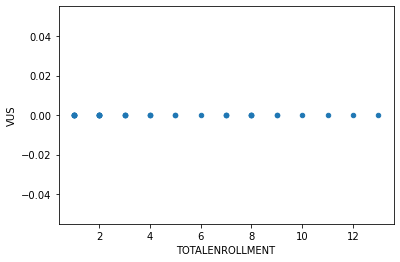

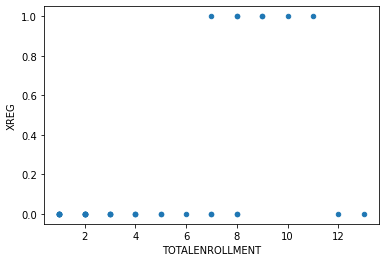

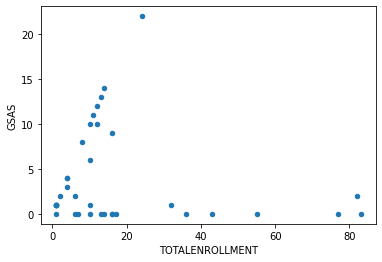

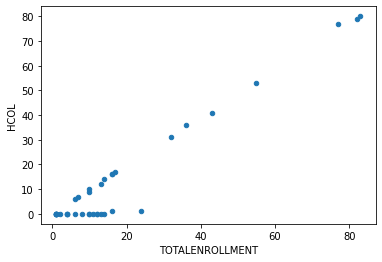

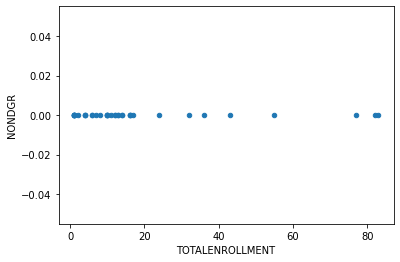

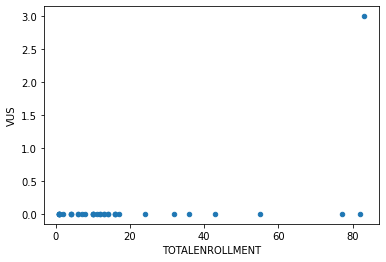

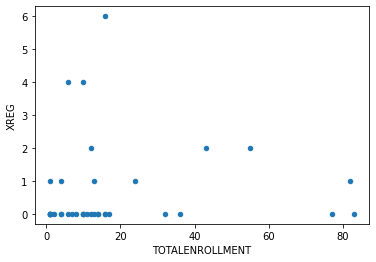

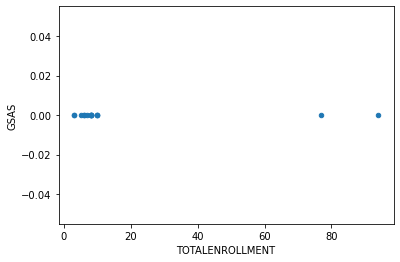

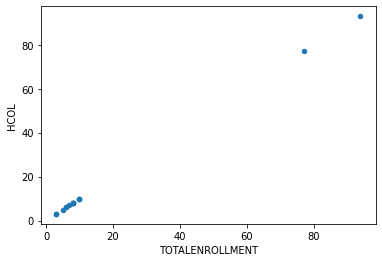

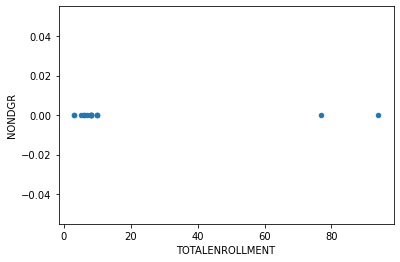

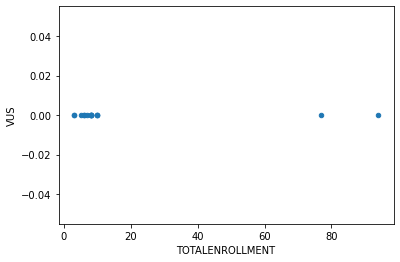

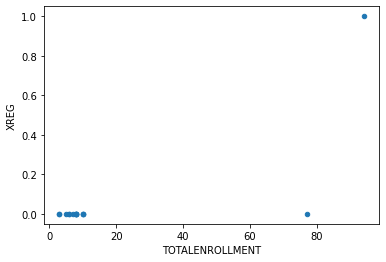

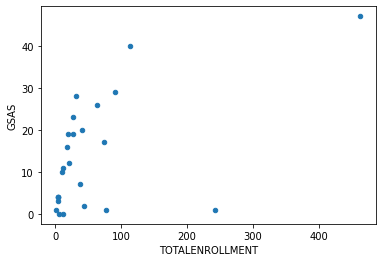

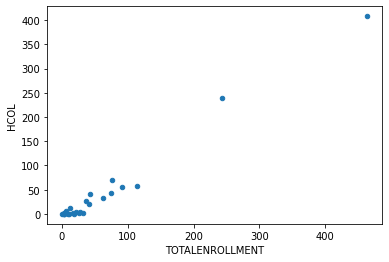

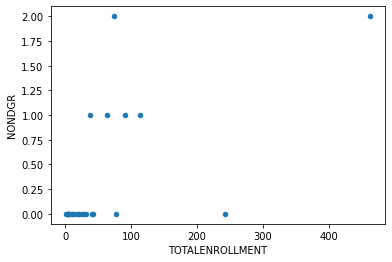

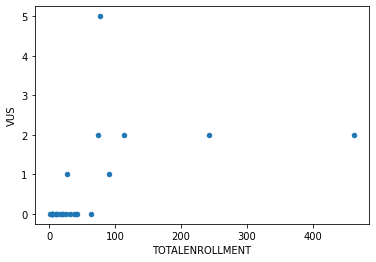

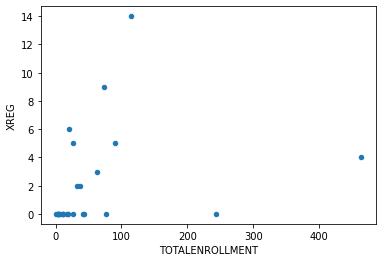

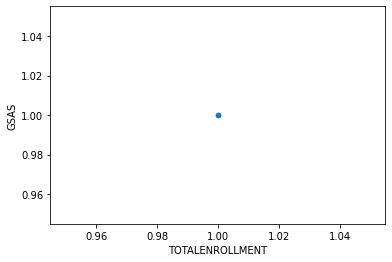

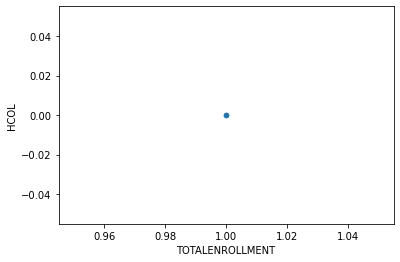

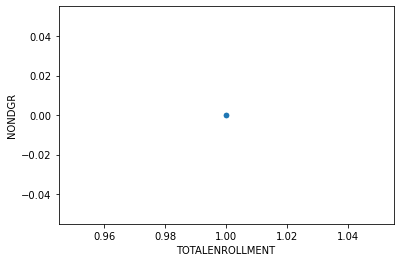

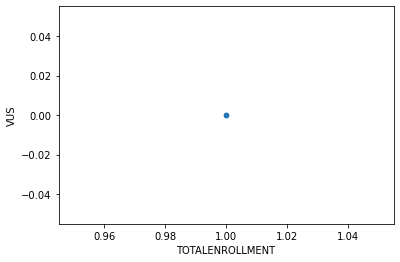

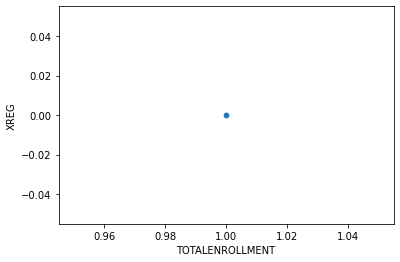

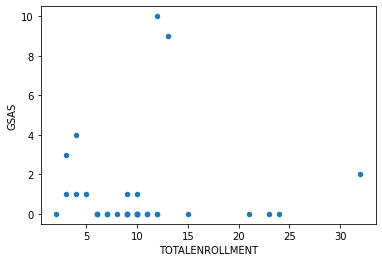

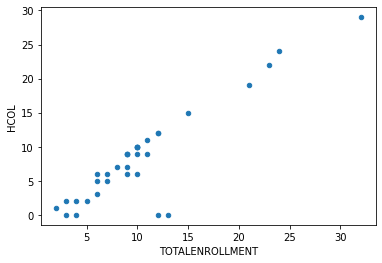

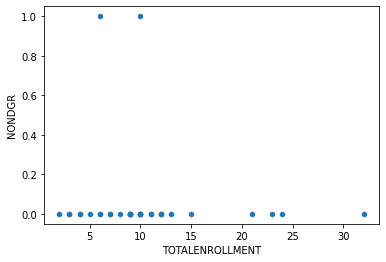

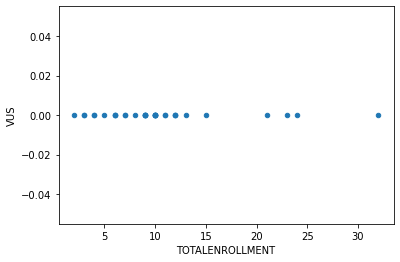

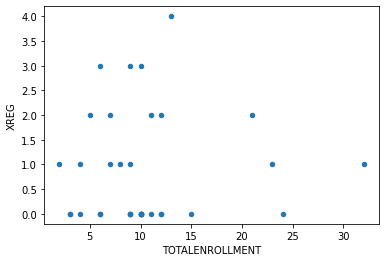

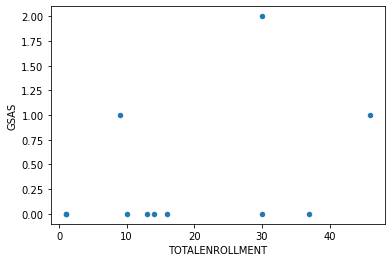

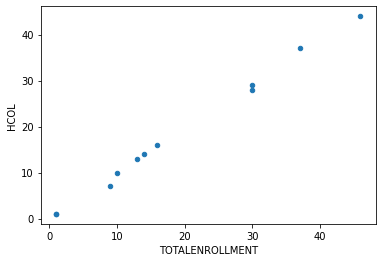

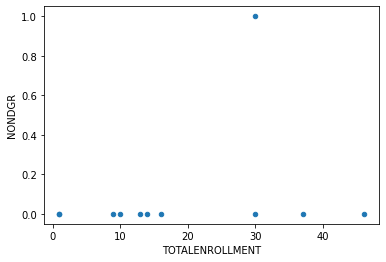

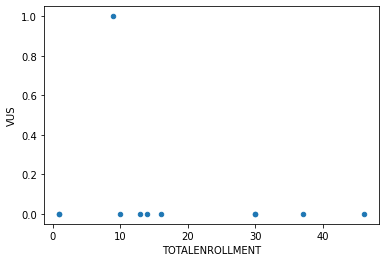

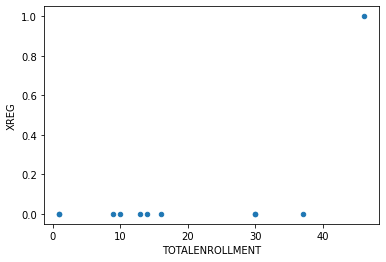

In [63]:
course_enrollment_by_department = []
#Start from the AAAS department until the end.
for index in range(course_enrollment.columns.get_loc("AAAS"), course_enrollment.shape[1]):
  department_name = course_enrollment.columns[index]
  department_filtered = course_enrollment[course_enrollment[department_name] == 1]
  course_enrollment_by_department.append(department_filtered)
  print('DEPARTMENT Name : ', department_name)
  print(department_filtered.describe())
  department_filtered.plot.scatter(x="TOTALENROLLMENT", y="GSAS")
  department_filtered.plot.scatter(x="TOTALENROLLMENT", y="HCOL")
  department_filtered.plot.scatter(x="TOTALENROLLMENT", y="NONDGR")
  department_filtered.plot.scatter(x="TOTALENROLLMENT", y="VUS")
  department_filtered.plot.scatter(x="TOTALENROLLMENT", y="XREG")


La estrategia aquí propuesta para descartar outliers será: Identificar cuales cursos poseen valores que se salen a mas de la media mas 2 desviaciones estándard para el DEPARTMENT

A continuacion se calculan las desviaciones estandar, los máximos y las medias

In [64]:
course_enrollment_by_department_mean = []
course_enrollment_by_department_median = []
course_enrollment_by_department_std = []
course_enrollment_by_department_max = []


for department in course_enrollment_by_department:
  course_enrollment_by_department_mean.append(department.mean())
  course_enrollment_by_department_median.append(department.median())
  course_enrollment_by_department_std.append(department.std())
  course_enrollment_by_department_max.append(department.max())



Ahora, creemos las nuevas listas con DF que serán limpiadas utilizando 2 std. Las entradas con valores mayores a mean + 2std se reemplazaran por el valor de la median

In [65]:
for i in range(len(course_enrollment_by_department)):
  course_enrollment_by_department[i]['GSAS'][course_enrollment_by_department[i]['GSAS'] >  course_enrollment_by_department_mean[i]['GSAS'] + 2*course_enrollment_by_department_std[i]['GSAS']] = course_enrollment_by_department_median[i]['GSAS']
  course_enrollment_by_department[i]['GSAS'][course_enrollment_by_department[i]['GSAS'] <  course_enrollment_by_department_mean[i]['GSAS'] - 2*course_enrollment_by_department_std[i]['GSAS']] = course_enrollment_by_department_median[i]['GSAS']
  course_enrollment_by_department[i]['HCOL'][course_enrollment_by_department[i]['HCOL'] >  course_enrollment_by_department_mean[i]['HCOL'] + 2*course_enrollment_by_department_std[i]['HCOL']] = course_enrollment_by_department_median[i]['HCOL']
  course_enrollment_by_department[i]['HCOL'][course_enrollment_by_department[i]['HCOL'] <  course_enrollment_by_department_mean[i]['HCOL'] - 2*course_enrollment_by_department_std[i]['HCOL']] = course_enrollment_by_department_median[i]['HCOL']
  course_enrollment_by_department[i]['NONDGR'][course_enrollment_by_department[i]['NONDGR'] >  course_enrollment_by_department_mean[i]['NONDGR'] + 2*course_enrollment_by_department_std[i]['NONDGR']] = course_enrollment_by_department_median[i]['NONDGR']
  course_enrollment_by_department[i]['NONDGR'][course_enrollment_by_department[i]['NONDGR'] <  course_enrollment_by_department_mean[i]['NONDGR'] - 2*course_enrollment_by_department_std[i]['NONDGR']] = course_enrollment_by_department_median[i]['NONDGR']
  course_enrollment_by_department[i]['VUS'][course_enrollment_by_department[i]['VUS'] >  course_enrollment_by_department_mean[i]['VUS'] + 2*course_enrollment_by_department_std[i]['VUS']] = course_enrollment_by_department_median[i]['VUS']
  course_enrollment_by_department[i]['VUS'][course_enrollment_by_department[i]['VUS'] <  course_enrollment_by_department_mean[i]['VUS'] - 2*course_enrollment_by_department_std[i]['VUS']] = course_enrollment_by_department_median[i]['VUS']
  course_enrollment_by_department[i]['XREG'][course_enrollment_by_department[i]['XREG'] >  course_enrollment_by_department_mean[i]['XREG'] + 2*course_enrollment_by_department_std[i]['XREG']] = course_enrollment_by_department_median[i]['XREG']
  course_enrollment_by_department[i]['XREG'][course_enrollment_by_department[i]['XREG'] <  course_enrollment_by_department_mean[i]['XREG'] - 2*course_enrollment_by_department_std[i]['XREG']] = course_enrollment_by_department_median[i]['XREG']

for index in range(course_enrollment.columns.get_loc("AAAS"), course_enrollment.shape[1]):
  department_name = course_enrollment.columns[index]
  print('DEPARTMENT Name : ', department_name)
  print( course_enrollment_by_department[index - course_enrollment.columns.get_loc("AAAS")].describe())

DEPARTMENT Name :  AAAS
       TOTALENROLLMENT       GSAS       HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        55.000000  55.000000  55.000000    55.0  ...  55.0  55.0  55.0  55.0
mean          8.963636   0.781818   4.890909     0.0  ...   0.0   0.0   0.0   0.0
std          14.700672   1.133512   6.590320     0.0  ...   0.0   0.0   0.0   0.0
min           1.000000   0.000000   0.000000     0.0  ...   0.0   0.0   0.0   0.0
25%           1.000000   0.000000   0.500000     0.0  ...   0.0   0.0   0.0   0.0
50%           3.000000   0.000000   2.000000     0.0  ...   0.0   0.0   0.0   0.0
75%          10.500000   1.000000   6.000000     0.0  ...   0.0   0.0   0.0   0.0
max          90.000000   4.000000  29.000000     0.0  ...   0.0   0.0   0.0   0.0

[8 rows x 74 columns]
DEPARTMENT Name :  AMER
       TOTALENROLLMENT       GSAS  HCOL  NONDGR  ...  STAT  URBP   VES  WMGS
count        15.000000  15.000000  15.0    15.0  ...  15.0  15.0  15.0  15.0
mean          2.200000   1.400000   0

Ahora lo que se necesita es volver a unir todos los datos del array: course_enrollment_by_department. 

In [66]:
course_enrollment_processed = pd.DataFrame()
course_enrollment_processed = course_enrollment_processed.append(course_enrollment_by_department)
course_enrollment_processed

,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG,AAAS,AMER,ANTH,ASTR,BIOE,BIPH,BIST,BSDM,BSPH,CELT,CHBI,CHEM,CHPB,CLAS,CPLT,DRAM,E&PS,EALC,ECON,EMR,ENGL,ESPP,EXPO,FAS,FOLK,FRSP,GENED,GERM,GLOBHLTH,GOVM,HAA,HEB,HIST,HLIT,HPOL,HSCI,HSS,HUM,LING,LSCI,MATH,MBB,MCB,MDSC,MDST,MUSC,NELC,NEURO,NODEPT,PHIL,PHYS,PSCI,PSYC,REECA,RELG,ROML,RSEA,SAST,SBIO,SCRB,SEAS,SLAV,SOCL,SOST,STAT,URBP,VES,WMGS
COURSE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFRAMER 16,15.0,0.0,15.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AFRAMER 20,51.0,0.0,2.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AFRAMER 90R,1.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AFRAMER 90R.A,6.0,1.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AFRAMER 90R.A1,11.0,2.0,8.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOMGEN 1237,46.0,1.0,44.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
WOMGEN 1253,16.0,0.0,16.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
WOMGEN 1258,37.0,0.0,37.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Ahora, la unica inconsistencia que existe es que el TOTALENROLLMENT no es realmente la suma de GSAS, HCOL, NONDGR, VUS y XREG. Cambiemos este valor por la suma de estos datos.

In [67]:
course_enrollment_processed['TOTALENROLLMENT'] = course_enrollment_processed['GSAS']	+ course_enrollment_processed['HCOL']	+ course_enrollment_processed['NONDGR']	+ course_enrollment_processed['VUS'] + 	course_enrollment_processed['XREG']

Visualicemos los datos processados para saber si son mas favorables

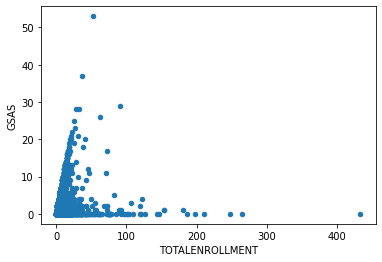

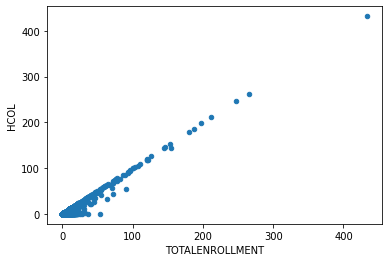

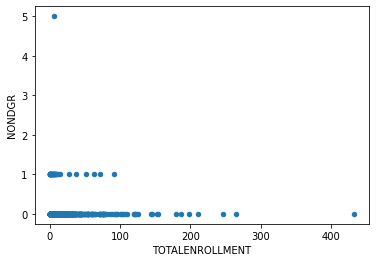

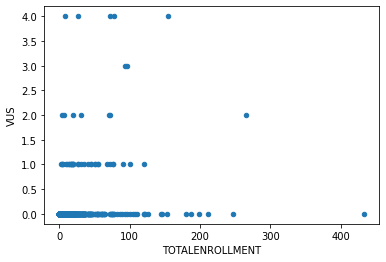

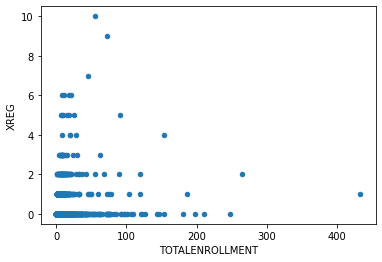

In [68]:
course_enrollment_processed.plot.scatter(x="TOTALENROLLMENT", y="GSAS")
course_enrollment_processed.plot.scatter(x="TOTALENROLLMENT", y="HCOL")
course_enrollment_processed.plot.scatter(x="TOTALENROLLMENT", y="NONDGR")
course_enrollment_processed.plot.scatter(x="TOTALENROLLMENT", y="VUS")
course_enrollment_processed.plot.scatter(x="TOTALENROLLMENT", y="XREG")

Visualmente podemos ver que existe un único grupo que tiene mas de 400 estudiantes inscritos. Haciendo una inspeccion visual procederemos a eliminar este curso de nuestro set de datos.

,TOTALENROLLMENT,GSAS,HCOL,NONDGR,VUS,XREG,AAAS,AMER,ANTH,ASTR,BIOE,BIPH,BIST,BSDM,BSPH,CELT,CHBI,CHEM,CHPB,CLAS,CPLT,DRAM,E&PS,EALC,ECON,EMR,ENGL,ESPP,EXPO,FAS,FOLK,FRSP,GENED,GERM,GLOBHLTH,GOVM,HAA,HEB,HIST,HLIT,HPOL,HSCI,HSS,HUM,LING,LSCI,MATH,MBB,MCB,MDSC,MDST,MUSC,NELC,NEURO,NODEPT,PHIL,PHYS,PSCI,PSYC,REECA,RELG,ROML,RSEA,SAST,SBIO,SCRB,SEAS,SLAV,SOCL,SOST,STAT,URBP,VES,WMGS
count,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000
mean,8.435996,2.128706,6.101500,0.013254,0.025462,0.167074,0.019184,0.005232,0.014649,0.009069,0.017440,0.006278,0.008720,0.000349,0.010464,0.003139,0.001046,0.013254,0.000698,0.020579,0.007674,0.004186,0.013952,0.027555,0.027904,0.000698,0.027206,0.002442,0.023369,0.000349,0.001744,0.029997,0.017440,0.009766,0.000698,0.022323,0.010464,0.012557,0.034182,0.004883,0.002790,0.009418,0.000349,0.001395,0.006278,0.001046,0.016045,0.001744,0.015347,0.093129,0.000698,0.016045,0.021277,0.002442,0.117893,0.017440,0.025462,0.000349,0.036624,0.000698,0.015696,0.038368,0.004883,0.012208,0.011161,0.004883,0.060342,0.012905,0.012905,0.005581,0.008720,0.000698,0.011859,0.003837
std,16.628997,3.383440,16.538547,0.141639,0.234157,0.634266,0.137195,0.072155,0.120166,0.094814,0.130926,0.079001,0.092989,0.018676,0.101774,0.055950,0.032337,0.114382,0.026407,0.141995,0.087277,0.064572,0.117312,0.163722,0.164726,0.026407,0.162712,0.049361,0.151100,0.018676,0.041732,0.170607,0.130926,0.098358,0.026407,0.147758,0.101774,0.111370,0.181728,0.069721,0.052759,0.096603,0.018676,0.037333,0.079001,0.032337,0.125669,0.041732,0.122950,0.290663,0.026407,0.125669,0.144330,0.049361,0.322538,0.130926,0.157552,0.018676,0.187869,0.026407,0.124318,0.192116,0.069721,0.109832,0.105075,0.069721,0.238161,0.112887,0.112887,0.074509,0.092989,0.026407,0.108271,0.061833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,0.000000,

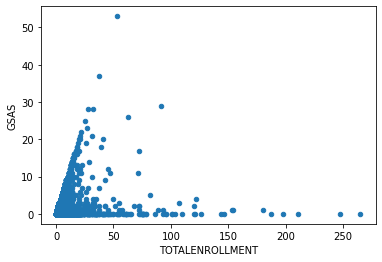

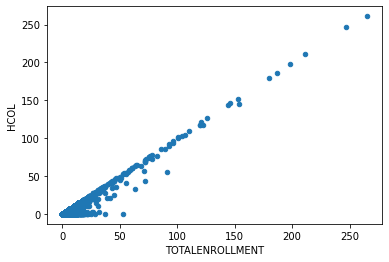

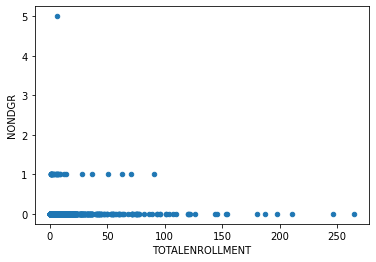

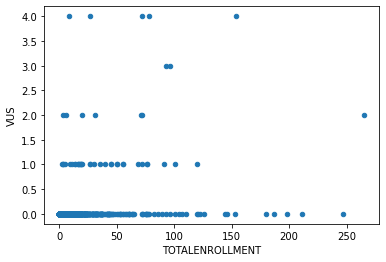

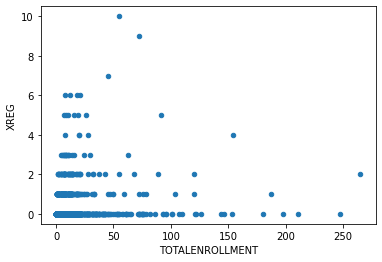

In [69]:
course_enrollment_processed.drop(course_enrollment_processed[course_enrollment_processed['TOTALENROLLMENT'] > 400].index, inplace=True)
course_enrollment_processed.plot.scatter(x="TOTALENROLLMENT", y="GSAS")
course_enrollment_processed.plot.scatter(x="TOTALENROLLMENT", y="HCOL")
course_enrollment_processed.plot.scatter(x="TOTALENROLLMENT", y="NONDGR")
course_enrollment_processed.plot.scatter(x="TOTALENROLLMENT", y="VUS")
course_enrollment_processed.plot.scatter(x="TOTALENROLLMENT", y="XREG")
course_enrollment_processed.describe()